# Problem Statement:

Fashion MNIST is a dataset comprising 60,000 training images and 10,000
testing images, each depicting various fashion items in a 28x28 grayscale format.
The dataset encompasses ten distinct categories of apparel. The primary aim of
this assignment is to develop a fully connected neural network (FCNN) that can
accurately classify these images into the correct fashion categories.

# Objectives:

### Data Visualization and Preprocessing:

● Visualize the distribution of different fashion items in the dataset to understand the data better.  
● Normalize the image pixel values for effective model training.  
● Convert the categorical labels into a one-hot encoded format to suit the neural network’s output layer.`

### Model Architecture and Development:

- Design a fully connected neural network with appropriate input, hidden, and output layers.  
- Ensure the model is complex enough to capture the underlying patterns in the data without overfitting.

### Model Training:

- Train the model on the preprocessed training data, using categorical cross-entropy as the loss function, stochastic gradient descent as the optimizer, and accuracy as the evaluation metric.  
- Utilize a validation split to monitor the model’s performance on unseen data during training.

### Performance Evaluation:

- Assess the model’s performance using both training and validation datasets.  
- Visualize the training and validation loss and accuracy to identify any signs of overfitting or underfitting.

# Solution:

## Loading the Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets.fashion_mnist import load_data 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import L1L2

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [5]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

Label difinitions are as followed:  
0 T-shirt/top  
1 Trouser  
2 Pullover  
3 Dress  
4 Coat  
5 Sandal  
6 Shirt  
7 Sneaker  
8 Bag  
9 Ankle boot  

#### All the classes are equally distributed, thus the dataset is balanced and there is no need for imbalance correction techniques

## Visualization of data

#### Lets visualize some random images taken from the dataset to understand the distibution better
#### To get a better idea lets visualize 30 random data points from each class

Class = 9


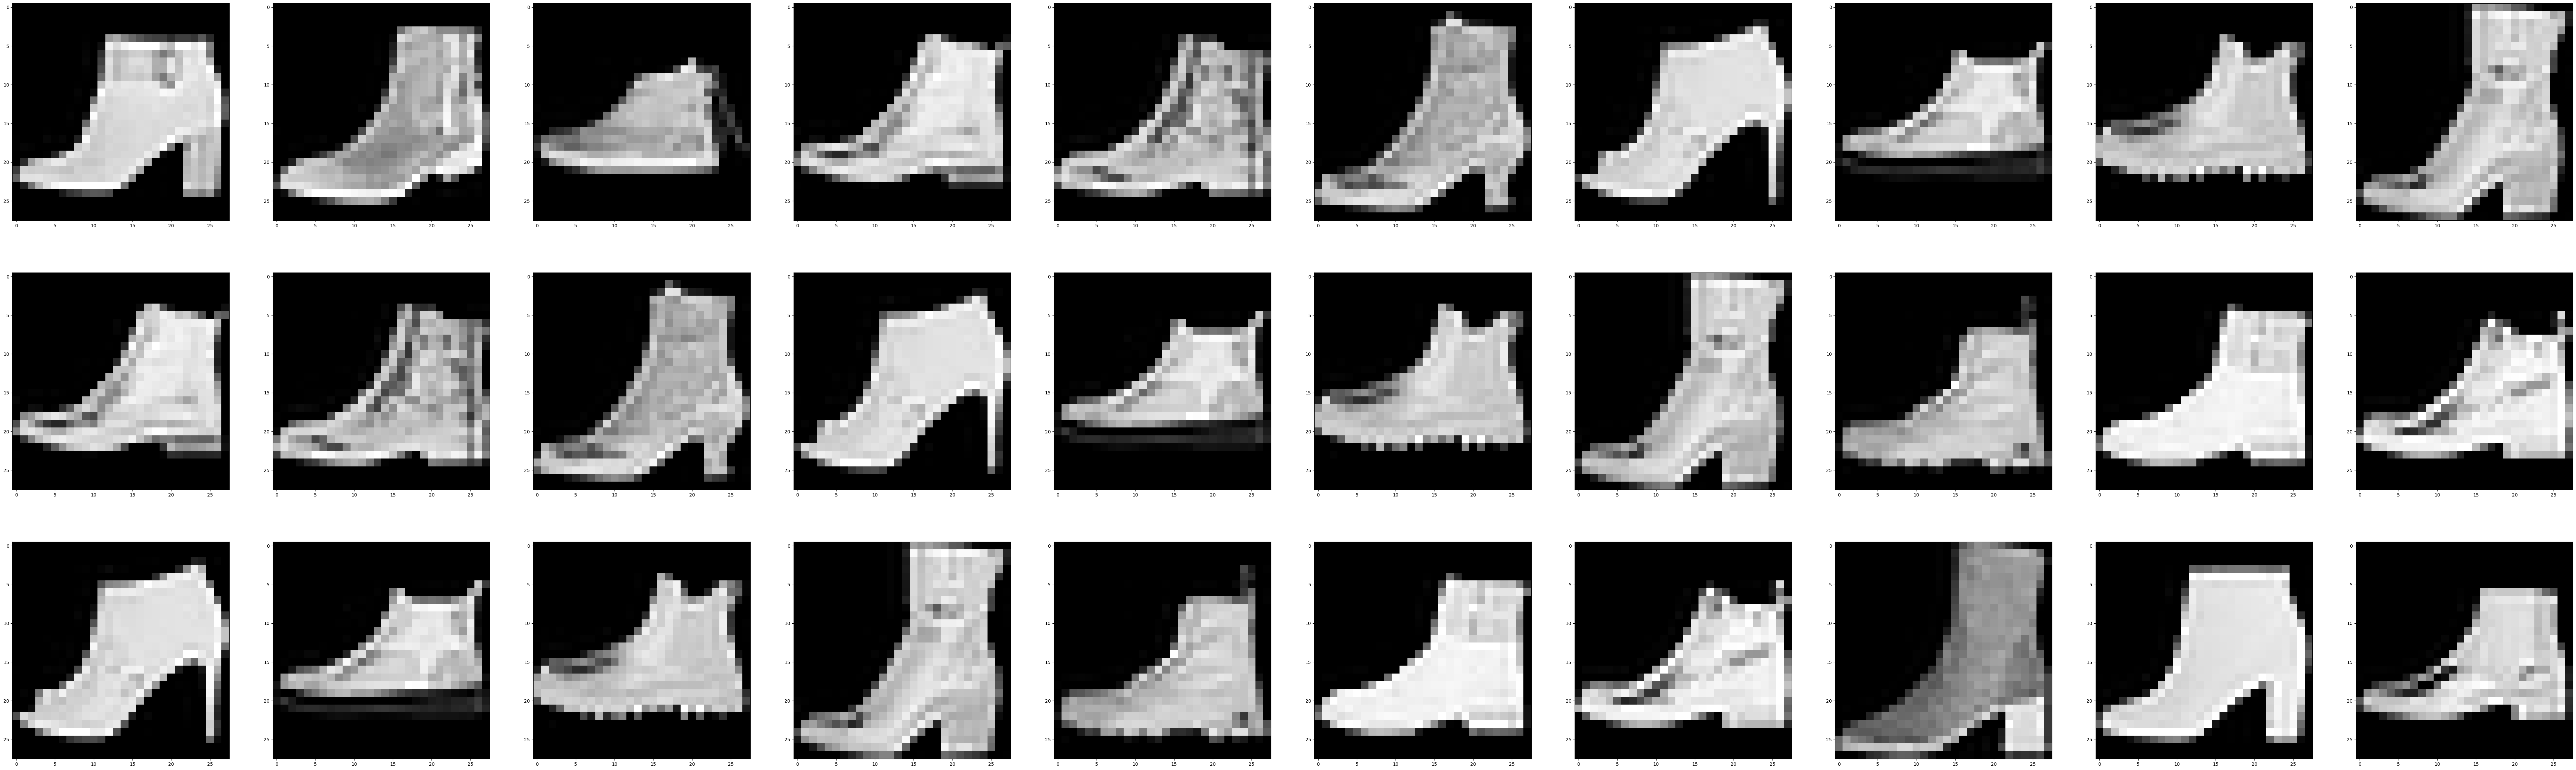

Class = 0


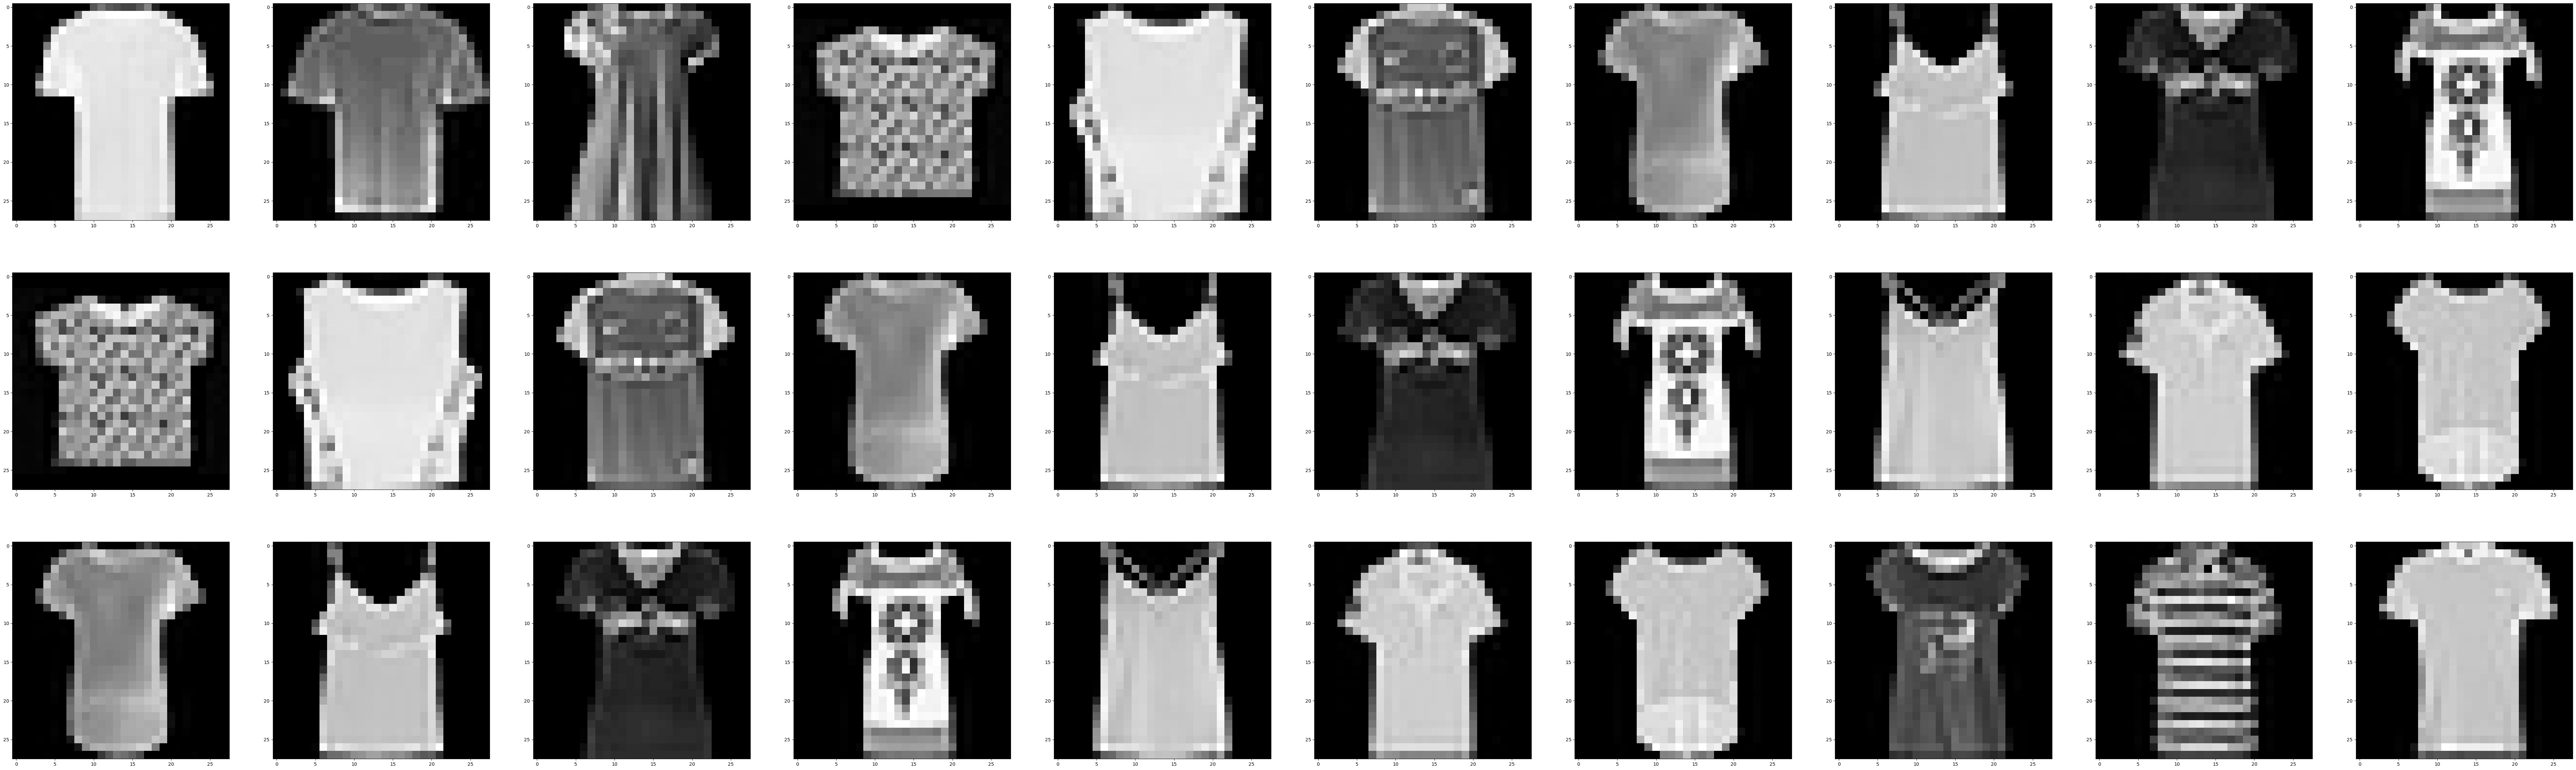

Class = 3


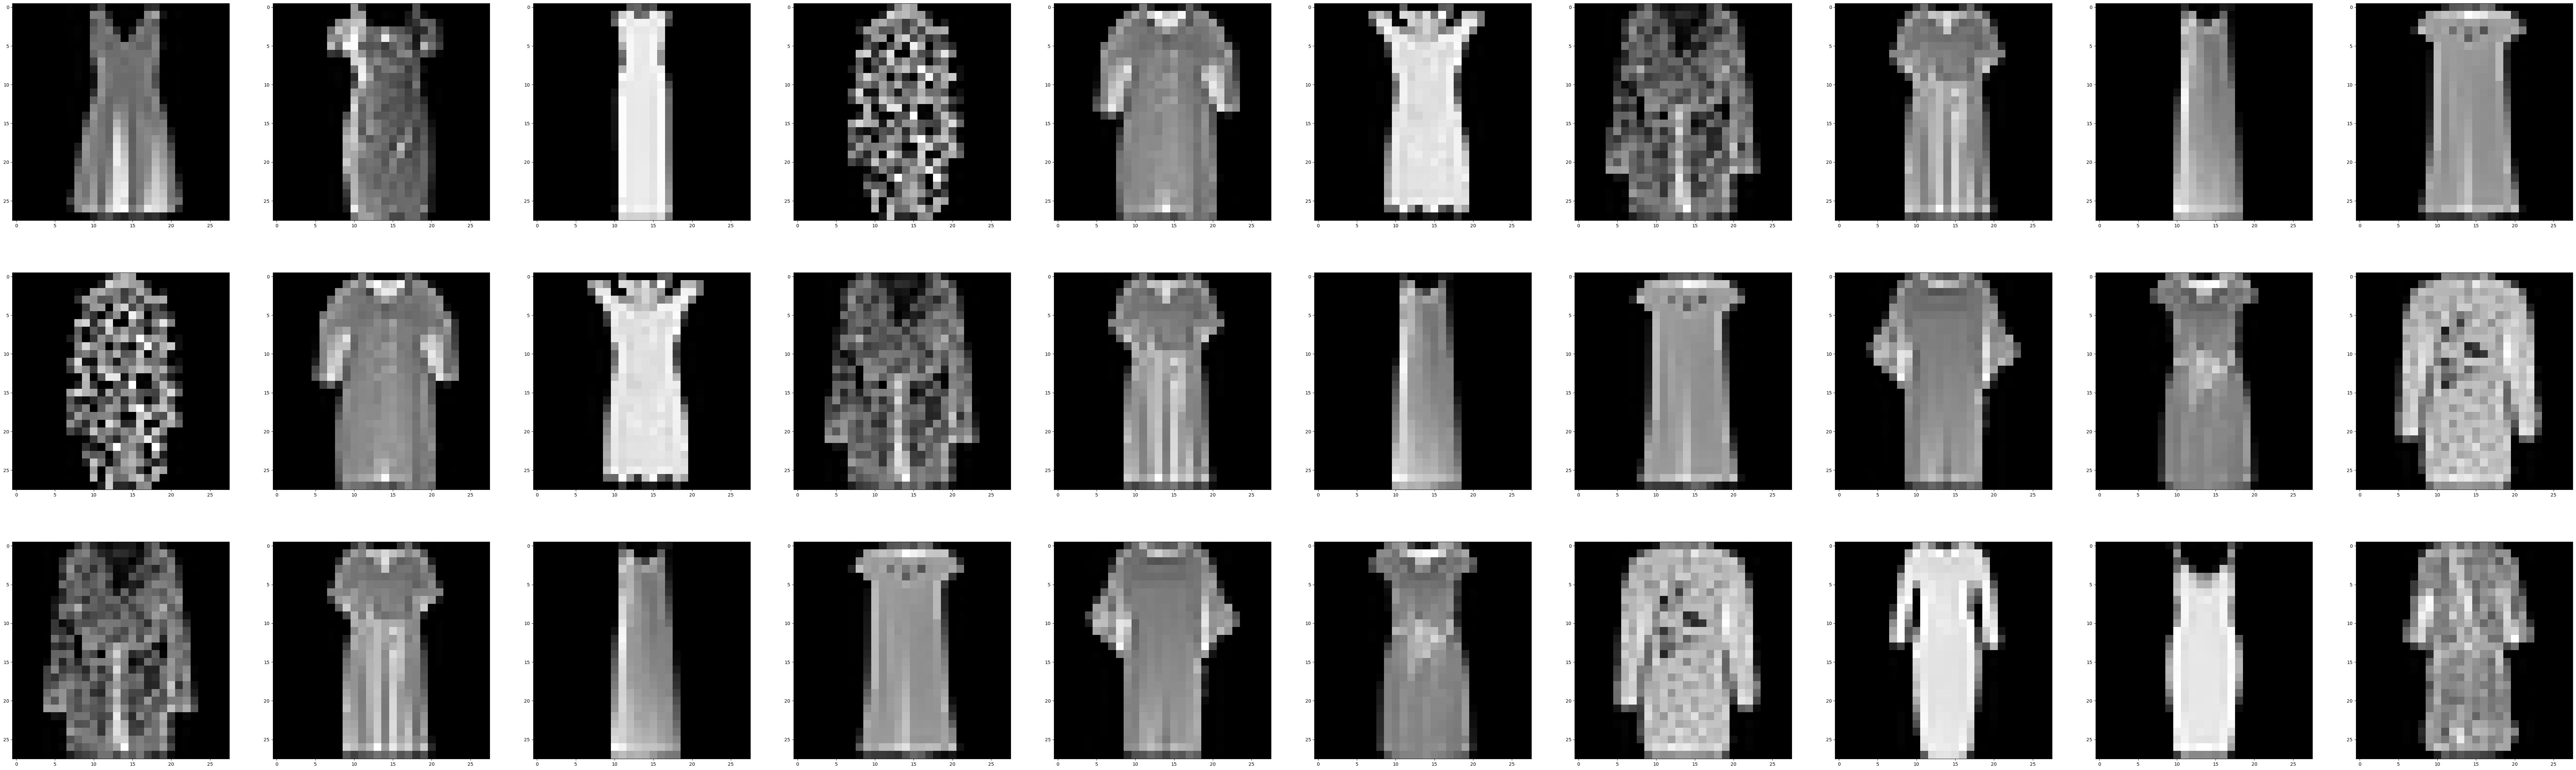

Class = 2


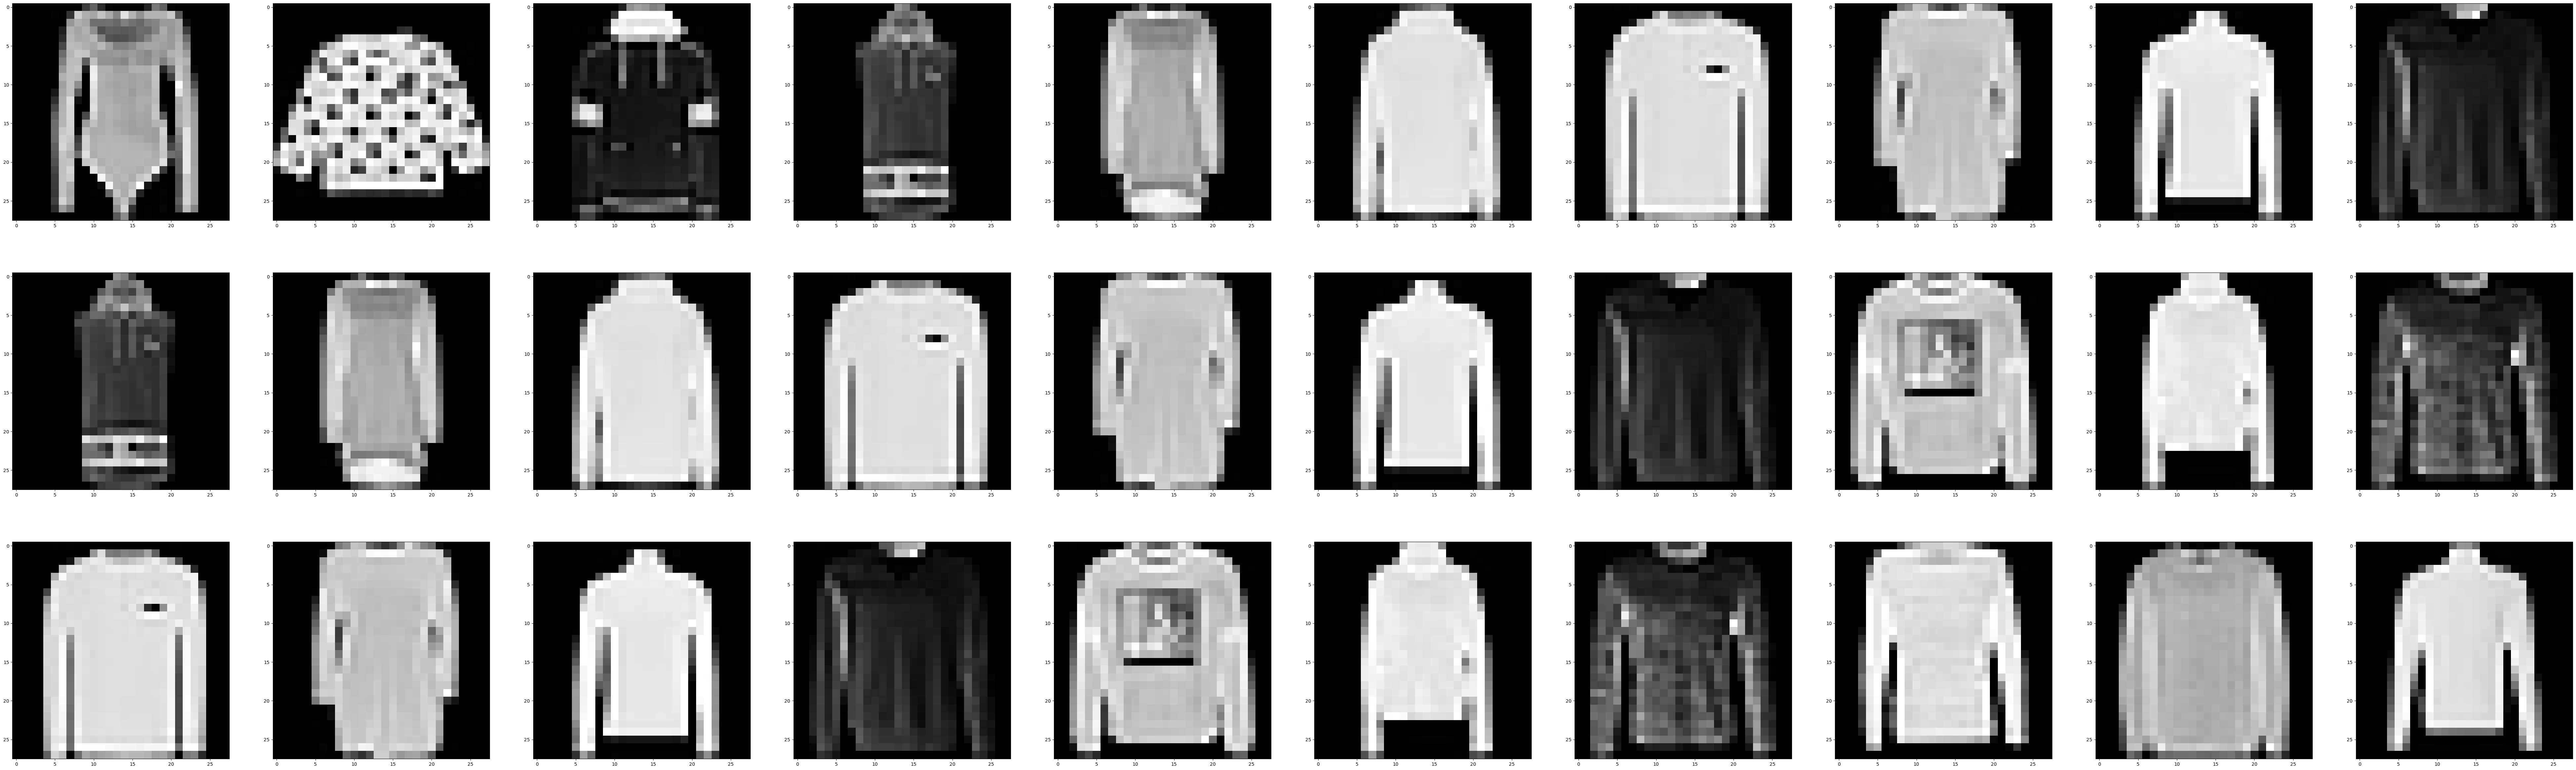

Class = 7


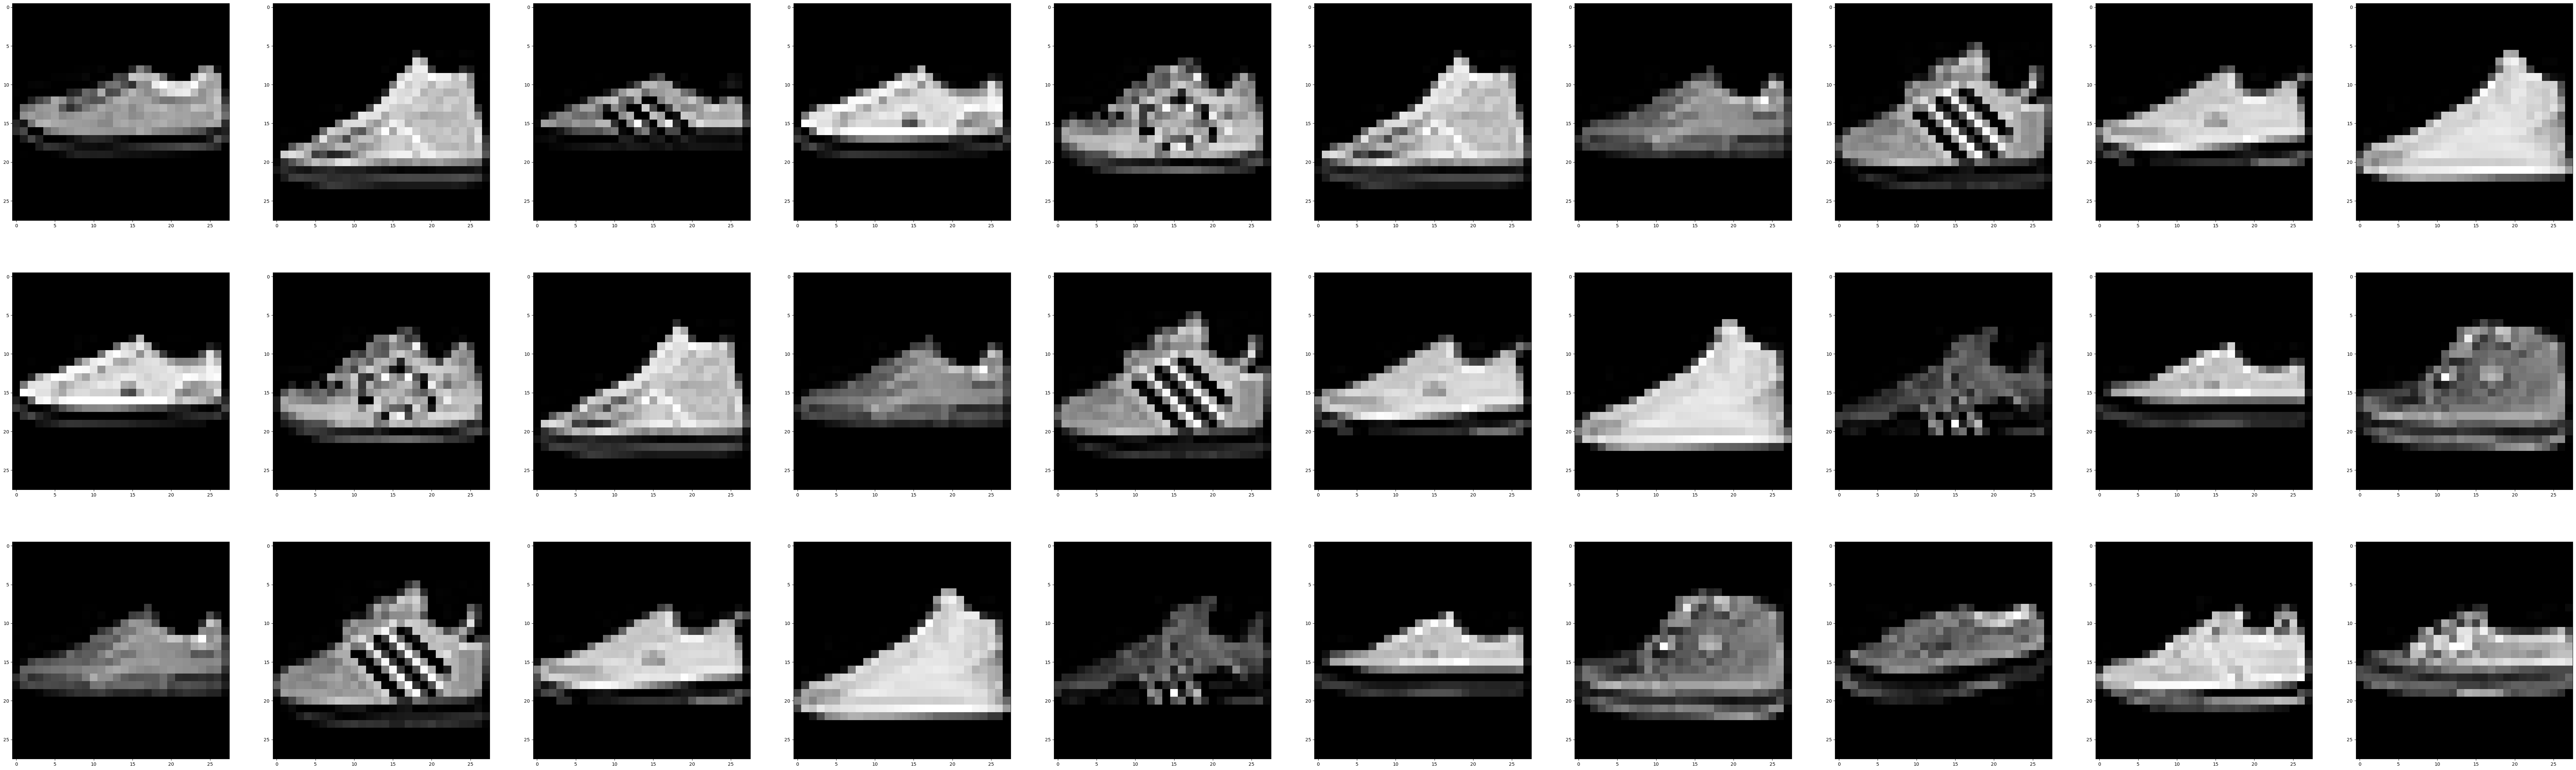

Class = 5


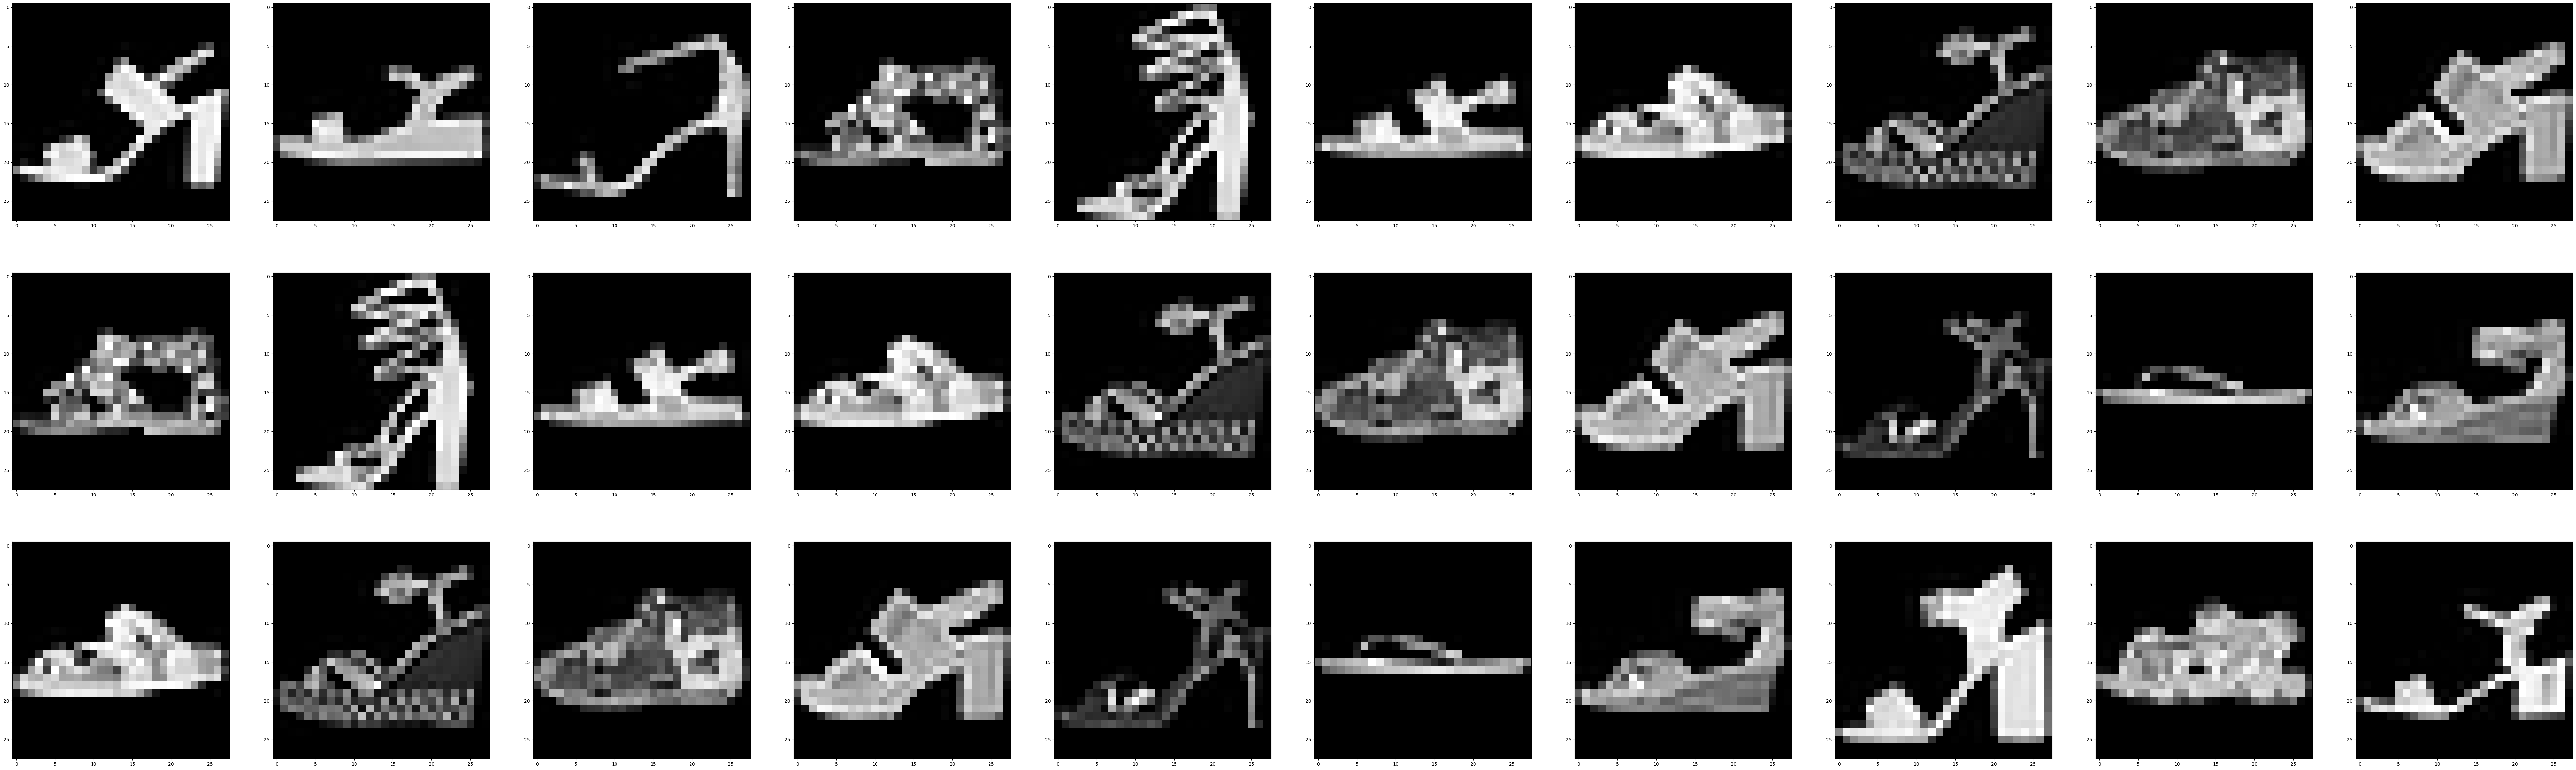

Class = 1


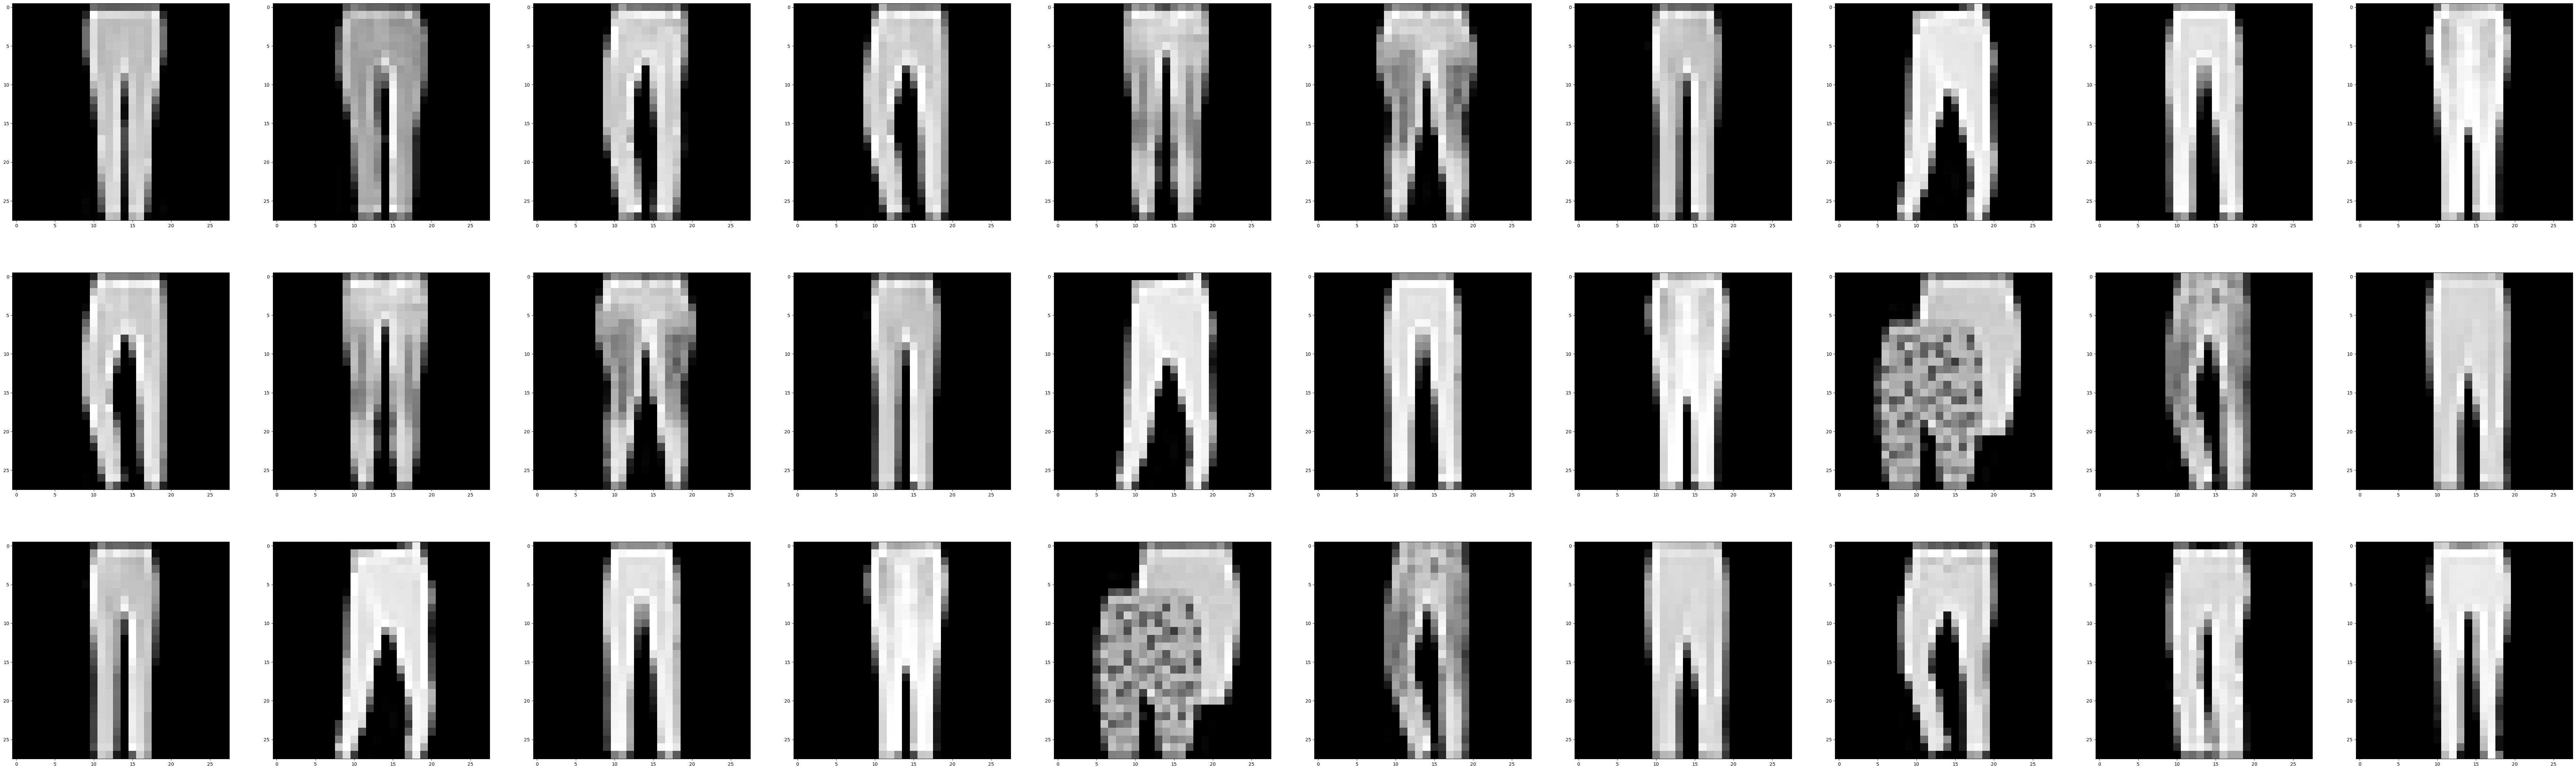

Class = 6


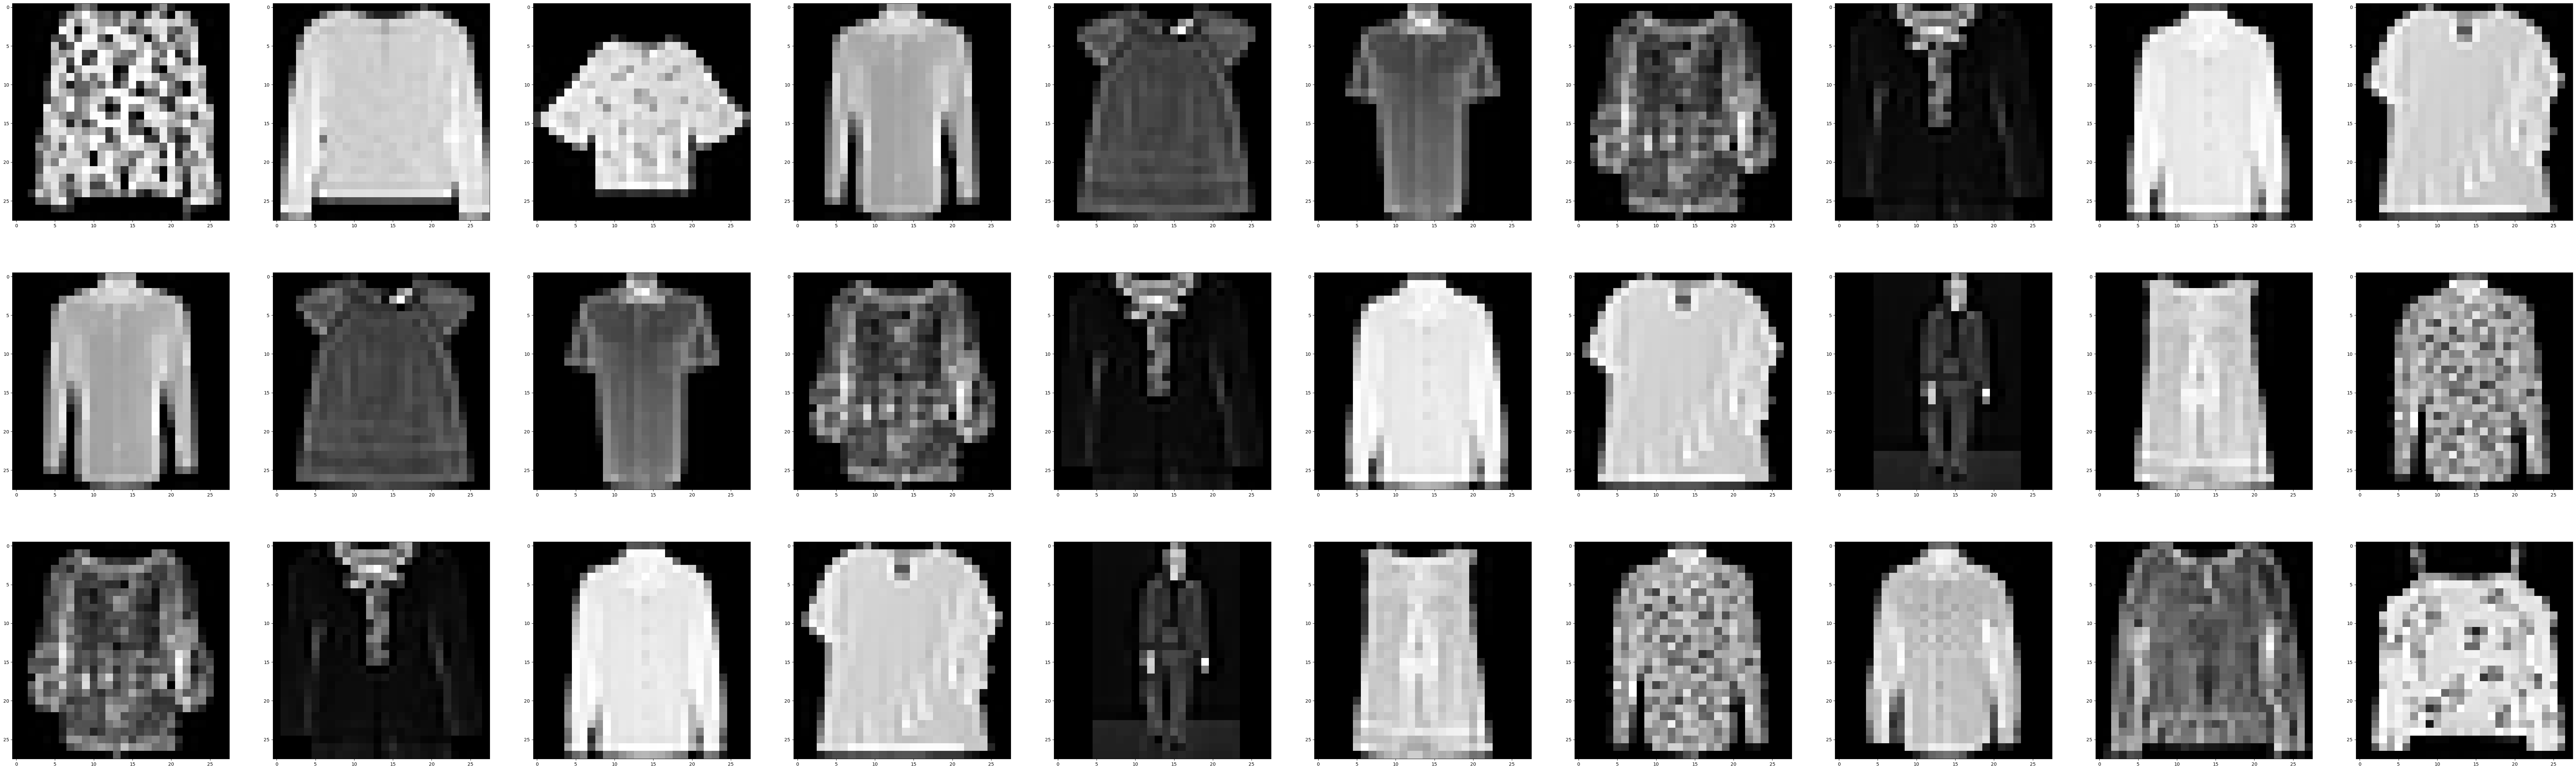

Class = 4


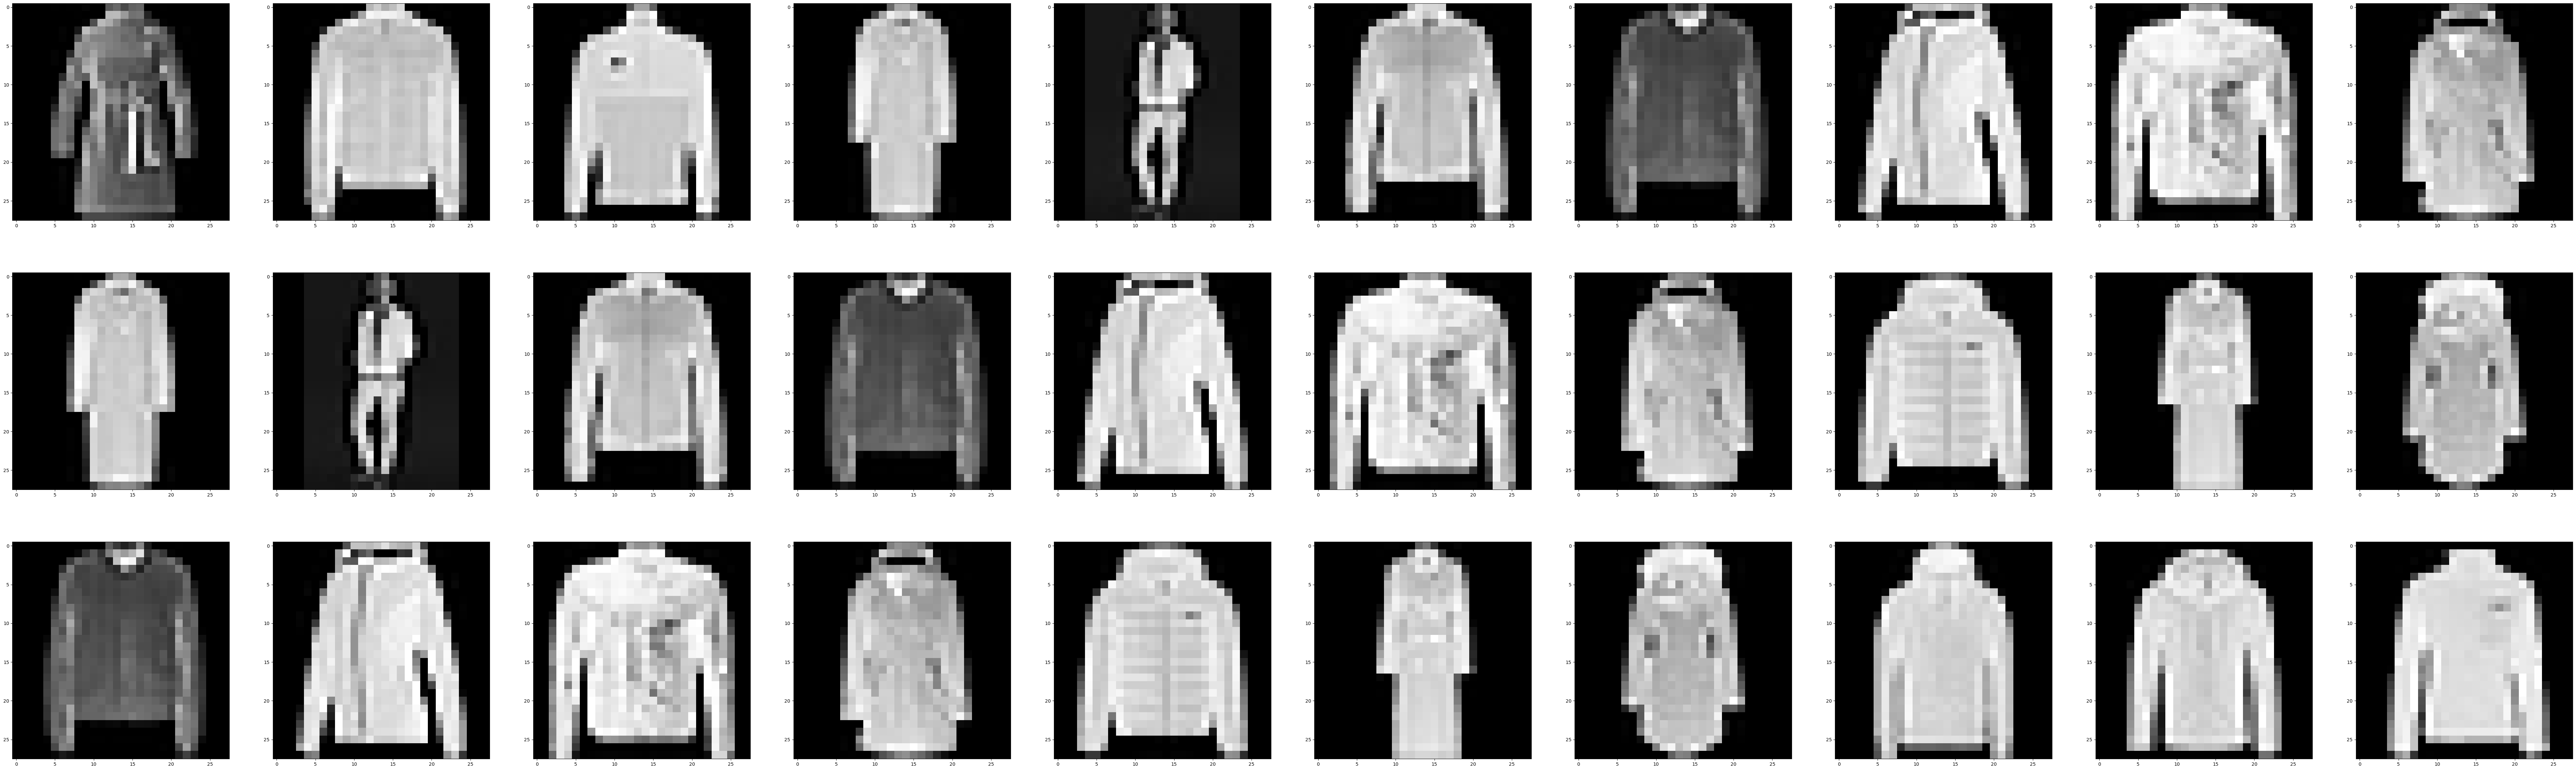

Class = 8


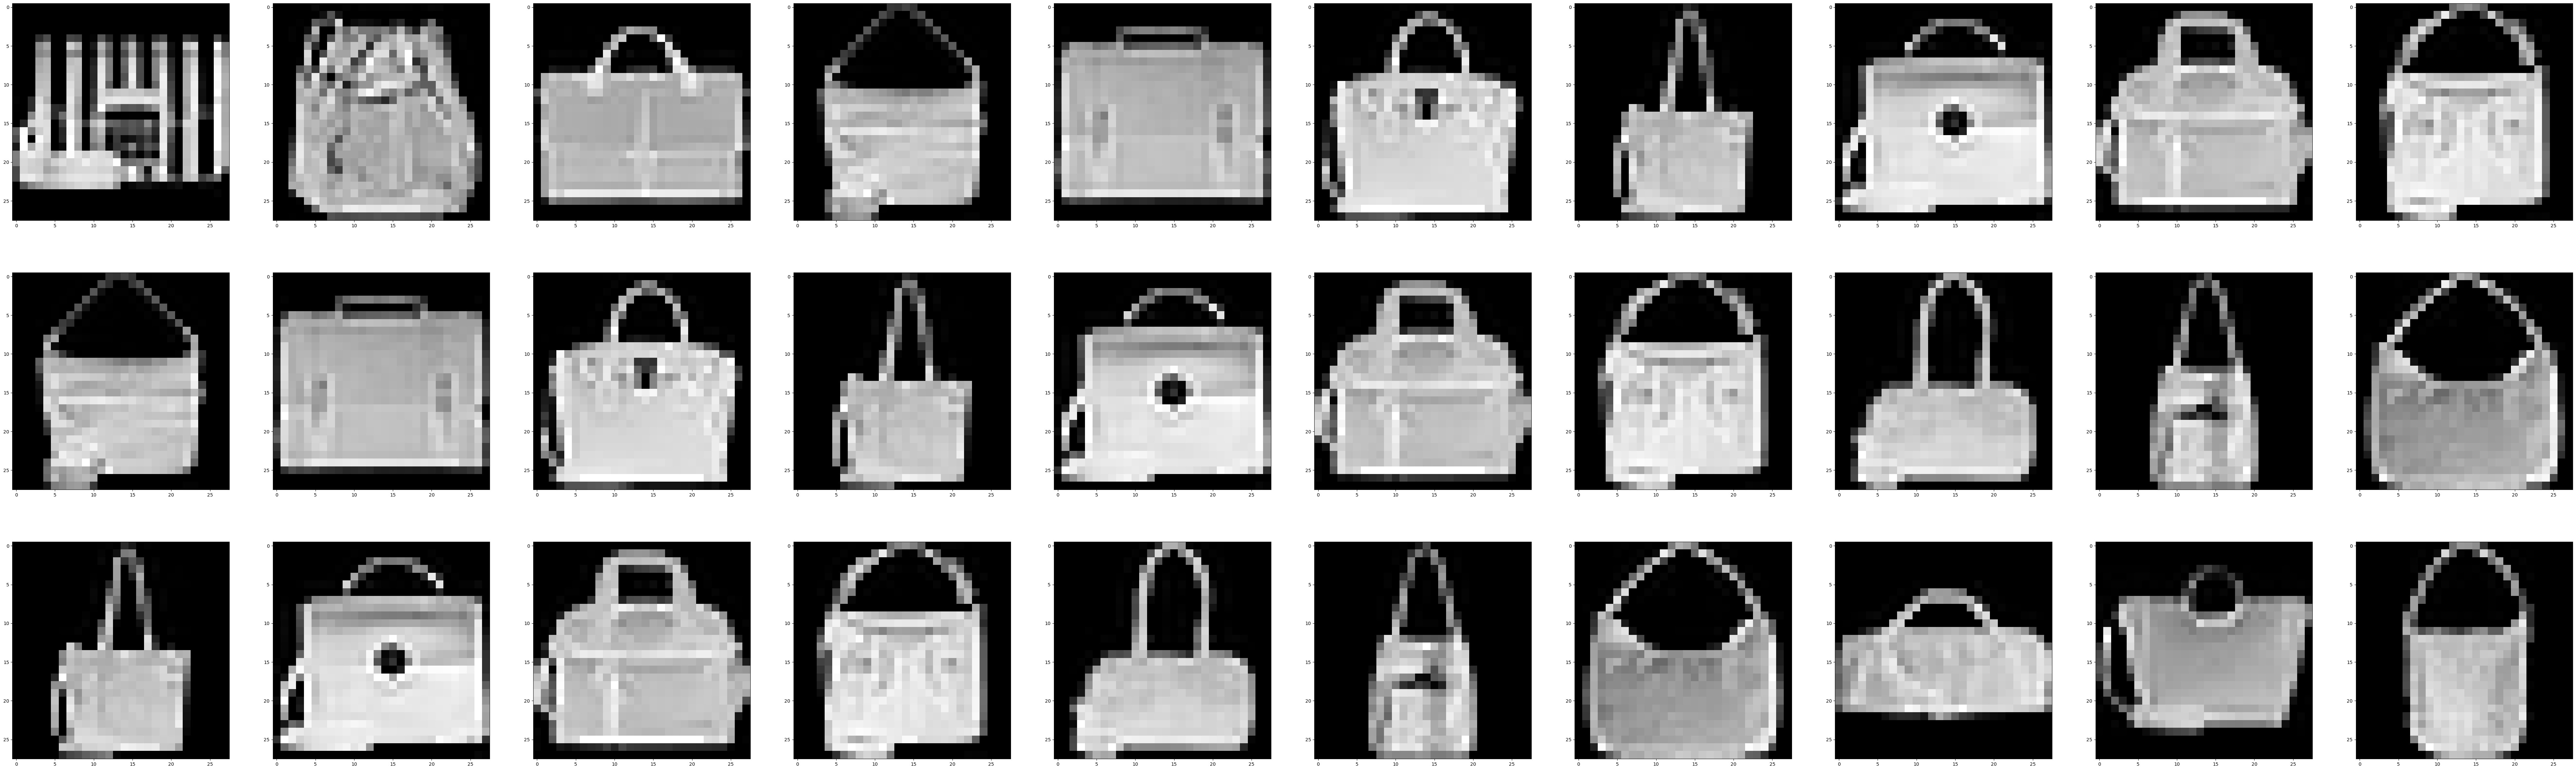

In [6]:
Y_train_series = pd.Series(y_train)
for cls in Y_train_series.unique():
    fig, ax = plt.subplots(3, 10, figsize = (100, 30))
    print(f'Class = {cls}')
    random_index_arr = np.random.choice(Y_train_series[Y_train_series == cls].index, 30)
    for i in range(3):
        for j in range(10):
            ax[i][j].imshow(x_train[random_index_arr[i*3+j]], cmap = 'gray')
    plt.show();

## Data Pre processing

In [7]:
x_train_reshape = x_train.reshape((60000, 784))
x_test_reshape = x_test.reshape((10000, 784))

In [8]:
# One hot encoding
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [9]:
# Validation split
x_train_partial, x_val, y_train_partial, y_val = train_test_split(x_train_reshape, y_train_ohe, test_size = 0.2, random_state = 123, stratify = y_train.reshape((-1, 1)))

In [10]:
# Normalization
scaler = MinMaxScaler()
x_train_partial_norm = scaler.fit_transform(x_train_partial)
x_val_norm = scaler.transform(x_val)

# Model Development

### Model 1 - No hidden layer as benchmark

In [11]:
no_of_epochs = 200
batch_size = 1000
learning_rate = 0.1

In [12]:
np.random.seed(123)
model1 = Sequential()
model1.add(Input(784,))
model1.add(Dense(10, activation = 'softmax'))
model1.compile(optimizer = SGD(learning_rate), loss = 'categorical_crossentropy', metrics = 'accuracy')
model1.fit(x_train_partial_norm, y_train_partial, validation_data = (x_val_norm, y_val), epochs = no_of_epochs, batch_size = batch_size, use_multiprocessing = True)


Epoch 1/200


48/48 [==============================] - 5s 20ms/step - loss: 1.1641 - accuracy: 0.6326 - val_loss: 0.8524 - val_accuracy: 0.7215
Epoch 2/200
48/48 [==============================] - 0s 10ms/step - loss: 0.7809 - accuracy: 0.7470 - val_loss: 0.7259 - val_accuracy: 0.7676
Epoch 3/200
48/48 [==============================] - 1s 12ms/step - loss: 0.6930 - accuracy: 0.7790 - val_loss: 0.6711 - val_accuracy: 0.7857
Epoch 4/200
48/48 [==============================] - 1s 11ms/step - loss: 0.6462 - accuracy: 0.7936 - val_loss: 0.6305 - val_accuracy: 0.7963
Epoch 5/200
48/48 [==============================] - 1s 12ms/step - loss: 0.6139 - accuracy: 0.8031 - val_loss: 0.6068 - val_accuracy: 0.8064
Epoch 6/200
48/48 [==============================] - 1s 10ms/step - loss: 0.5912 - accuracy: 0.8088 - val_loss: 0.5898 - val_accuracy: 0.8080
Epoch 7/200
48/48 [==============================] - 0s 10ms/step - loss: 0.5739 - accuracy: 0.8137 - val_loss: 0.5725 - val_accuracy: 0.8135
Epo

Epoch 54/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4340 - accuracy: 0.8525 - val_loss: 0.4544 - val_accuracy: 0.8488
Epoch 55/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4334 - accuracy: 0.8520 - val_loss: 0.4535 - val_accuracy: 0.8487
Epoch 56/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4322 - accuracy: 0.8526 - val_loss: 0.4527 - val_accuracy: 0.8479
Epoch 57/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4317 - accuracy: 0.8522 - val_loss: 0.4522 - val_accuracy: 0.8482
Epoch 58/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4310 - accuracy: 0.8531 - val_loss: 0.4510 - val_accuracy: 0.8491
Epoch 59/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4302 - accuracy: 0.8529 - val_loss: 0.4518 - val_accuracy: 0.8478
Epoch 60/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4297 - accuracy: 0.8530 - val_loss: 0.4558 - val_accuracy: 0.8464
Epoch 

48/48 [==============================] - 0s 9ms/step - loss: 0.4073 - accuracy: 0.8601 - val_loss: 0.4355 - val_accuracy: 0.8537
Epoch 112/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4069 - accuracy: 0.8603 - val_loss: 0.4341 - val_accuracy: 0.8553
Epoch 113/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4065 - accuracy: 0.8599 - val_loss: 0.4345 - val_accuracy: 0.8546
Epoch 114/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4069 - accuracy: 0.8600 - val_loss: 0.4343 - val_accuracy: 0.8542
Epoch 115/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4058 - accuracy: 0.8604 - val_loss: 0.4357 - val_accuracy: 0.8537
Epoch 116/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4061 - accuracy: 0.8602 - val_loss: 0.4347 - val_accuracy: 0.8536
Epoch 117/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4058 - accuracy: 0.8604 - val_loss: 0.4343 - val_accuracy: 0.8547
Epoch 118/200

48/48 [==============================] - 0s 9ms/step - loss: 0.3947 - accuracy: 0.8638 - val_loss: 0.4284 - val_accuracy: 0.8573
Epoch 169/200
48/48 [==============================] - 0s 9ms/step - loss: 0.3950 - accuracy: 0.8635 - val_loss: 0.4271 - val_accuracy: 0.8567
Epoch 170/200
48/48 [==============================] - 0s 9ms/step - loss: 0.3944 - accuracy: 0.8638 - val_loss: 0.4276 - val_accuracy: 0.8566
Epoch 171/200
48/48 [==============================] - 0s 9ms/step - loss: 0.3941 - accuracy: 0.8643 - val_loss: 0.4271 - val_accuracy: 0.8568
Epoch 172/200
48/48 [==============================] - 0s 9ms/step - loss: 0.3939 - accuracy: 0.8639 - val_loss: 0.4272 - val_accuracy: 0.8570
Epoch 173/200
48/48 [==============================] - 0s 9ms/step - loss: 0.3939 - accuracy: 0.8645 - val_loss: 0.4266 - val_accuracy: 0.8574
Epoch 174/200
48/48 [==============================] - 0s 9ms/step - loss: 0.3935 - accuracy: 0.8648 - val_loss: 0.4294 - val_accuracy: 0.8559
Epoch 175/200

In [13]:
train_loss1 = model1.history.history['loss']
val_loss1 = model1.history.history['val_loss']

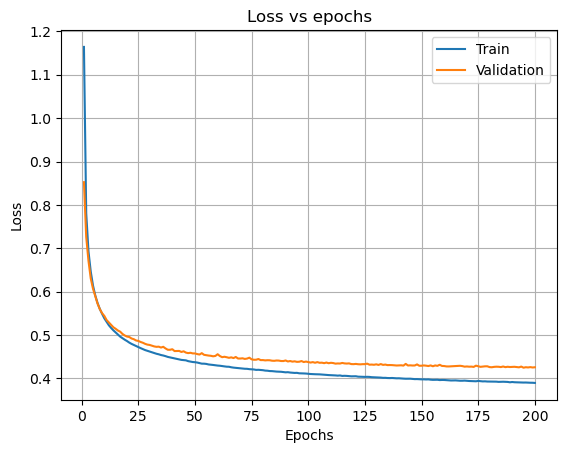

In [14]:
plt.plot(range(1, no_of_epochs + 1), train_loss1, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss1, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

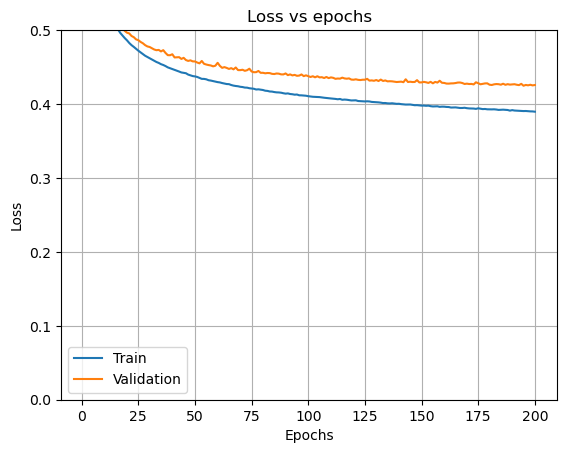

In [15]:
plt.plot(range(1, no_of_epochs + 1), train_loss1, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss1, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.5)
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

In [16]:
train_accuracy1 = model1.history.history['accuracy']
val_accuracy1 = model1.history.history['val_accuracy']

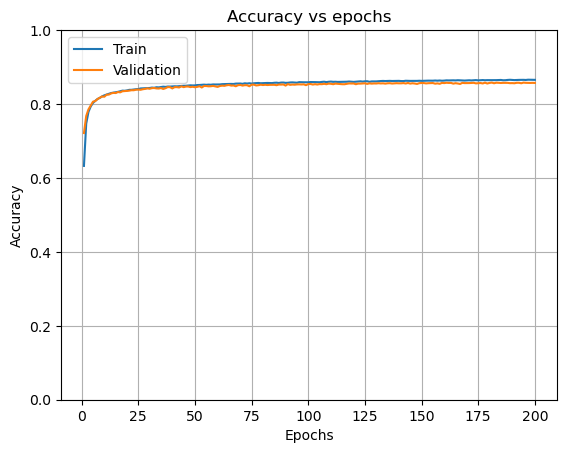

In [17]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy1, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy1, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

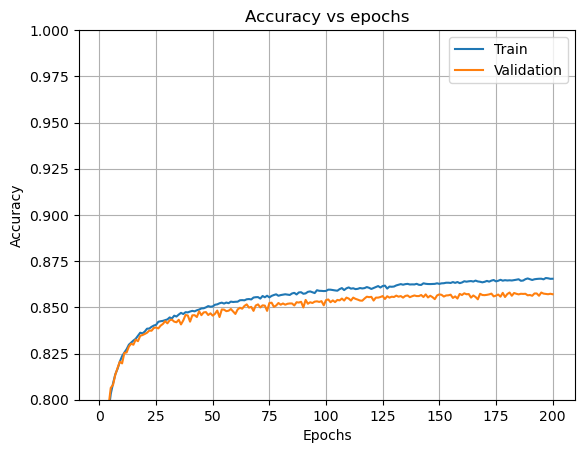

In [18]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy1, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy1, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

#### There is a bit of overfitting but it is not too much that cant be worked with and this serves as a good benchmark. We will try further to improve this model by fine tuning the neural network.

### Model 2 - One hidden layer with 100 neurons

In [19]:
np.random.seed(123)
model2 = Sequential()
model2.add(Input((784,)))
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(10, activation = 'softmax'))
model2.compile(optimizer = SGD(learning_rate), loss = 'categorical_crossentropy', metrics = 'accuracy')
model2.fit(x_train_partial_norm, y_train_partial, validation_data = (x_val_norm, y_val), epochs = no_of_epochs, batch_size = batch_size, use_multiprocessing = True)

Epoch 1/200
48/48 [==============================] - 2s 25ms/step - loss: 1.1427 - accuracy: 0.6380 - val_loss: 0.7882 - val_accuracy: 0.7423
Epoch 2/200
48/48 [==============================] - 1s 17ms/step - loss: 0.7340 - accuracy: 0.7495 - val_loss: 0.6745 - val_accuracy: 0.7729
Epoch 3/200
48/48 [==============================] - 1s 17ms/step - loss: 0.6469 - accuracy: 0.7785 - val_loss: 0.6436 - val_accuracy: 0.7748
Epoch 4/200
48/48 [==============================] - 1s 16ms/step - loss: 0.5922 - accuracy: 0.7972 - val_loss: 0.5726 - val_accuracy: 0.8040
Epoch 5/200
48/48 [==============================] - 1s 18ms/step - loss: 0.5874 - accuracy: 0.7952 - val_loss: 0.6065 - val_accuracy: 0.7912
Epoch 6/200
48/48 [==============================] - 1s 18ms/step - loss: 0.5453 - accuracy: 0.8130 - val_loss: 0.5370 - val_accuracy: 0.8119
Epoch 7/200
48/48 [==============================] - 1s 19ms/step - loss: 0.5202 - accuracy: 0.8212 - val_loss: 0.5110 - val_accuracy: 0.8263
Epoch 

48/48 [==============================] - 1s 16ms/step - loss: 0.3351 - accuracy: 0.8812 - val_loss: 0.3668 - val_accuracy: 0.8715
Epoch 59/200
48/48 [==============================] - 1s 16ms/step - loss: 0.3324 - accuracy: 0.8815 - val_loss: 0.3792 - val_accuracy: 0.8695
Epoch 60/200
48/48 [==============================] - 1s 17ms/step - loss: 0.3304 - accuracy: 0.8832 - val_loss: 0.3667 - val_accuracy: 0.8724
Epoch 61/200
48/48 [==============================] - 1s 16ms/step - loss: 0.3306 - accuracy: 0.8827 - val_loss: 0.3600 - val_accuracy: 0.8755
Epoch 62/200
48/48 [==============================] - 1s 16ms/step - loss: 0.3269 - accuracy: 0.8841 - val_loss: 0.3678 - val_accuracy: 0.8714
Epoch 63/200
48/48 [==============================] - 1s 16ms/step - loss: 0.3310 - accuracy: 0.8805 - val_loss: 0.3675 - val_accuracy: 0.8715
Epoch 64/200
48/48 [==============================] - 1s 16ms/step - loss: 0.3315 - accuracy: 0.8815 - val_loss: 0.3899 - val_accuracy: 0.8593
Epoch 65/200

48/48 [==============================] - 1s 17ms/step - loss: 0.2810 - accuracy: 0.8996 - val_loss: 0.3318 - val_accuracy: 0.8846
Epoch 116/200
48/48 [==============================] - 1s 16ms/step - loss: 0.2803 - accuracy: 0.9005 - val_loss: 0.3302 - val_accuracy: 0.8827
Epoch 117/200
48/48 [==============================] - 1s 16ms/step - loss: 0.2808 - accuracy: 0.8989 - val_loss: 0.3327 - val_accuracy: 0.8816
Epoch 118/200
48/48 [==============================] - 1s 16ms/step - loss: 0.2739 - accuracy: 0.9014 - val_loss: 0.3376 - val_accuracy: 0.8777
Epoch 119/200
48/48 [==============================] - 1s 16ms/step - loss: 0.2782 - accuracy: 0.8997 - val_loss: 0.3568 - val_accuracy: 0.8687
Epoch 120/200
48/48 [==============================] - 1s 16ms/step - loss: 0.2785 - accuracy: 0.9005 - val_loss: 0.3318 - val_accuracy: 0.8833
Epoch 121/200
48/48 [==============================] - 1s 16ms/step - loss: 0.2726 - accuracy: 0.9027 - val_loss: 0.3364 - val_accuracy: 0.8823
Epoch 

Epoch 172/200
48/48 [==============================] - 1s 16ms/step - loss: 0.2453 - accuracy: 0.9129 - val_loss: 0.3190 - val_accuracy: 0.8866
Epoch 173/200
48/48 [==============================] - 1s 16ms/step - loss: 0.2478 - accuracy: 0.9109 - val_loss: 0.3164 - val_accuracy: 0.8867
Epoch 174/200
48/48 [==============================] - 1s 16ms/step - loss: 0.2454 - accuracy: 0.9122 - val_loss: 0.3261 - val_accuracy: 0.8817
Epoch 175/200
48/48 [==============================] - 1s 17ms/step - loss: 0.2410 - accuracy: 0.9144 - val_loss: 0.3256 - val_accuracy: 0.8845
Epoch 176/200
48/48 [==============================] - 1s 19ms/step - loss: 0.2439 - accuracy: 0.9125 - val_loss: 0.3258 - val_accuracy: 0.8821
Epoch 177/200
48/48 [==============================] - 1s 17ms/step - loss: 0.2403 - accuracy: 0.9150 - val_loss: 0.3210 - val_accuracy: 0.8848
Epoch 178/200
48/48 [==============================] - 1s 17ms/step - loss: 0.2421 - accuracy: 0.9140 - val_loss: 0.3209 - val_accuracy:

In [20]:
train_loss2 = model2.history.history['loss']
val_loss2 = model2.history.history['val_loss']

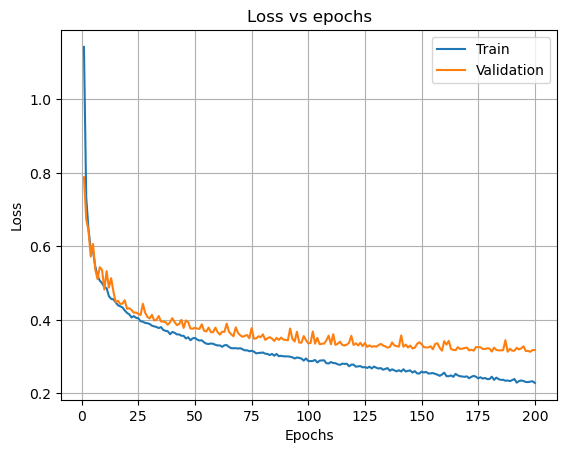

In [21]:
plt.plot(range(1, no_of_epochs + 1), train_loss2, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss2, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

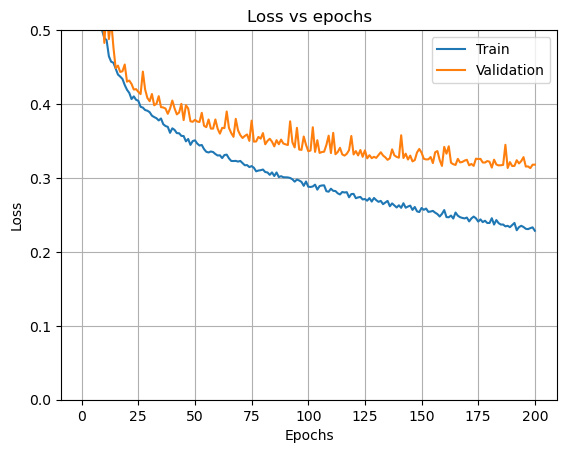

In [22]:
plt.plot(range(1, no_of_epochs + 1), train_loss2, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss2, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.5)
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

In [23]:
train_accuracy2 = model2.history.history['accuracy']
val_accuracy2 = model2.history.history['val_accuracy']

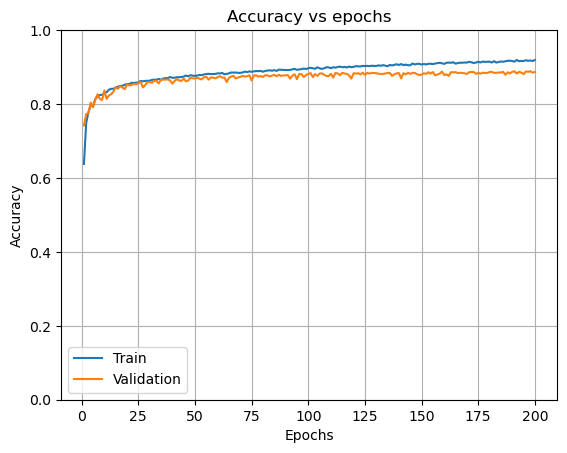

In [24]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy2, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy2, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

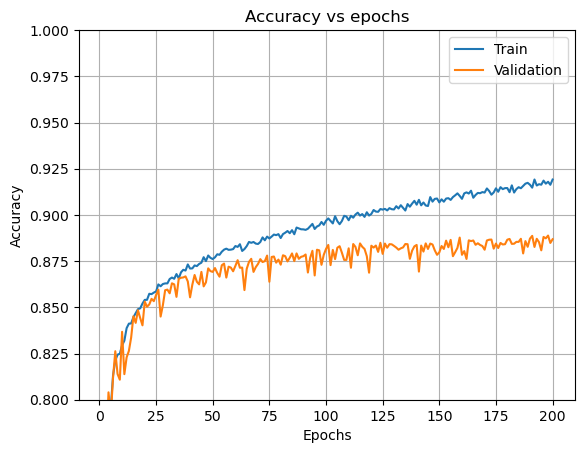

In [25]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy2, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy2, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

#### The loss has decreased compared to benchmark model while the accuracy has increased indicating towards the importance of adding a hidden layer or how more non-linear features are able to better represent the patterns. But there is a lot of overfitting with this many neurons and it might be benficial to use overfitting techniques. 

#### We could use following techniques to handle overfitting:  
1. Reduce number of neurons in the hidden layer.  
2. Dropout
3. Regularization  

### Model 3 - One hidden layer with lesser number of neurons

In [26]:
np.random.seed(123)
model3 = Sequential()
model3.add(Dense(6, activation = 'relu'))
model3.add(Dense(10, activation = 'softmax'))
model3.compile(optimizer = SGD(learning_rate), loss = 'categorical_crossentropy', metrics = 'accuracy')
model3.fit(x_train_partial_norm, y_train_partial, validation_data = (x_val_norm, y_val), epochs = no_of_epochs, batch_size = batch_size, use_multiprocessing = True)

Epoch 1/200
48/48 [==============================] - 2s 17ms/step - loss: 1.9162 - accuracy: 0.3631 - val_loss: 1.5500 - val_accuracy: 0.5308
Epoch 2/200
48/48 [==============================] - 0s 10ms/step - loss: 1.3188 - accuracy: 0.5754 - val_loss: 1.1474 - val_accuracy: 0.6219
Epoch 3/200
48/48 [==============================] - 0s 10ms/step - loss: 1.0482 - accuracy: 0.6526 - val_loss: 0.9616 - val_accuracy: 0.6760
Epoch 4/200
48/48 [==============================] - 1s 11ms/step - loss: 0.8668 - accuracy: 0.7106 - val_loss: 0.7915 - val_accuracy: 0.7423
Epoch 5/200
48/48 [==============================] - 0s 9ms/step - loss: 0.7622 - accuracy: 0.7398 - val_loss: 0.7531 - val_accuracy: 0.7256
Epoch 6/200
48/48 [==============================] - 0s 9ms/step - loss: 0.7133 - accuracy: 0.7477 - val_loss: 0.7413 - val_accuracy: 0.7244
Epoch 7/200
48/48 [==============================] - 0s 9ms/step - loss: 0.6716 - accuracy: 0.7647 - val_loss: 0.7124 - val_accuracy: 0.7537
Epoch 8/2

Epoch 59/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4804 - accuracy: 0.8282 - val_loss: 0.4945 - val_accuracy: 0.8269
Epoch 60/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4783 - accuracy: 0.8301 - val_loss: 0.4941 - val_accuracy: 0.8303
Epoch 61/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4766 - accuracy: 0.8307 - val_loss: 0.4976 - val_accuracy: 0.8254
Epoch 62/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4807 - accuracy: 0.8291 - val_loss: 0.5256 - val_accuracy: 0.8118
Epoch 63/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4741 - accuracy: 0.8308 - val_loss: 0.4995 - val_accuracy: 0.8236
Epoch 64/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4725 - accuracy: 0.8320 - val_loss: 0.5133 - val_accuracy: 0.8183
Epoch 65/200
48/48 [==============================] - 0s 8ms/step - loss: 0.4711 - accuracy: 0.8315 - val_loss: 0.5050 - val_accuracy: 0.8229
Epoch 

48/48 [==============================] - 0s 9ms/step - loss: 0.4449 - accuracy: 0.8411 - val_loss: 0.4782 - val_accuracy: 0.8357
Epoch 117/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4485 - accuracy: 0.8403 - val_loss: 0.4820 - val_accuracy: 0.8338
Epoch 118/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4510 - accuracy: 0.8396 - val_loss: 0.4803 - val_accuracy: 0.8361
Epoch 119/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4469 - accuracy: 0.8425 - val_loss: 0.4990 - val_accuracy: 0.8317
Epoch 120/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4492 - accuracy: 0.8401 - val_loss: 0.4846 - val_accuracy: 0.8337
Epoch 121/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4461 - accuracy: 0.8408 - val_loss: 0.4812 - val_accuracy: 0.8349
Epoch 122/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4540 - accuracy: 0.8371 - val_loss: 0.4786 - val_accuracy: 0.8390
Epoch 123/200

48/48 [==============================] - 0s 9ms/step - loss: 0.4327 - accuracy: 0.8471 - val_loss: 0.4698 - val_accuracy: 0.8407
Epoch 174/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4313 - accuracy: 0.8471 - val_loss: 0.4776 - val_accuracy: 0.8378
Epoch 175/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4333 - accuracy: 0.8459 - val_loss: 0.4748 - val_accuracy: 0.8394
Epoch 176/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4327 - accuracy: 0.8455 - val_loss: 0.4725 - val_accuracy: 0.8403
Epoch 177/200
48/48 [==============================] - 1s 10ms/step - loss: 0.4278 - accuracy: 0.8486 - val_loss: 0.4704 - val_accuracy: 0.8398
Epoch 178/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4296 - accuracy: 0.8476 - val_loss: 0.4806 - val_accuracy: 0.8393
Epoch 179/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4300 - accuracy: 0.8482 - val_loss: 0.4736 - val_accuracy: 0.8372
Epoch 180/20

In [27]:
train_loss3 = model3.history.history['loss']
val_loss3 = model3.history.history['val_loss']

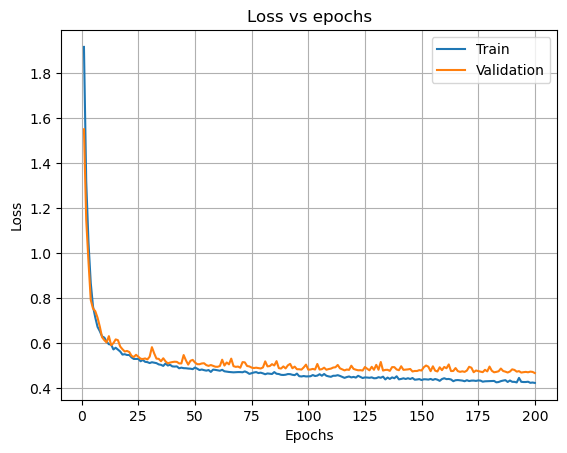

In [28]:
plt.plot(range(1, no_of_epochs + 1), train_loss3, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss3, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

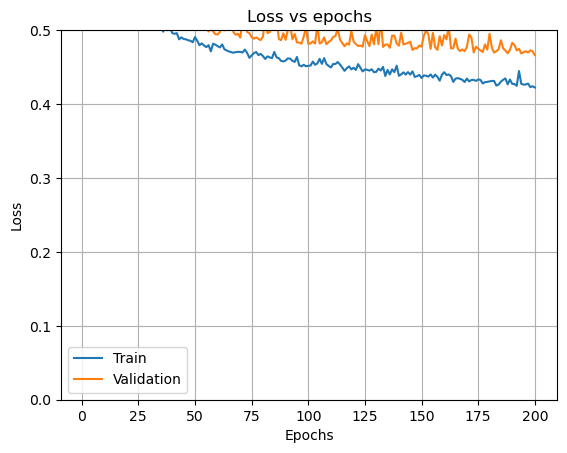

In [29]:
plt.plot(range(1, no_of_epochs + 1), train_loss3, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss3, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.5)
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

In [30]:
train_accuracy3 = model3.history.history['accuracy']
val_accuracy3 = model3.history.history['val_accuracy']

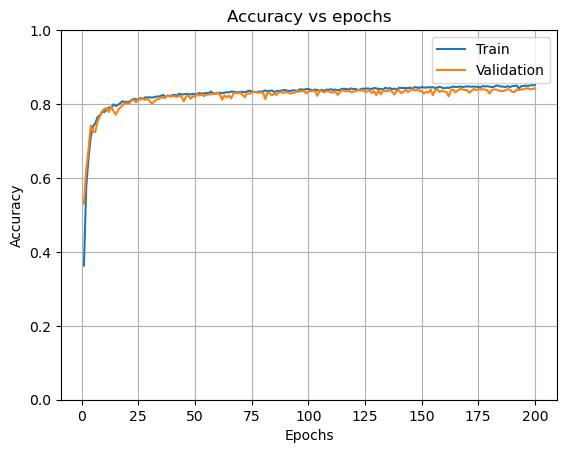

In [31]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy3, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy3, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

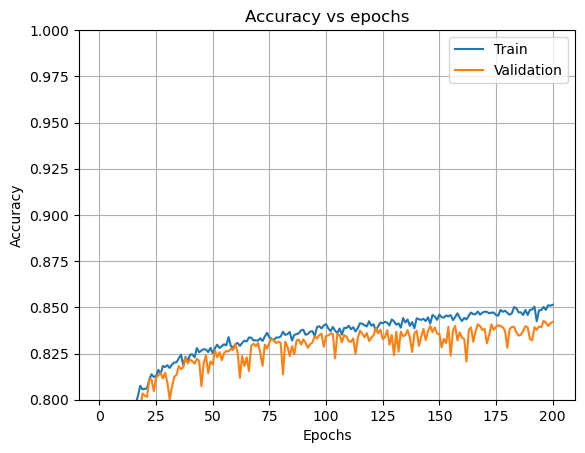

In [32]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy3, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy3, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

#### The model is seen to not overfit or underfit but the performance is worse than benchmark model. Thus, we discard this model from evaluation.

### Model 4 - One hidden layer with 100 neurons and dropout

In [33]:
np.random.seed(123)
model4 = Sequential()
model4.add(Dense(100, activation = 'relu'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation = 'softmax'))
model4.compile(optimizer = SGD(learning_rate), loss = 'categorical_crossentropy', metrics = 'accuracy')
model4.fit(x_train_partial_norm, y_train_partial, validation_data = (x_val_norm, y_val), epochs = no_of_epochs, batch_size = batch_size, use_multiprocessing = True)

Epoch 1/200
48/48 [==============================] - 2s 26ms/step - loss: 1.3972 - accuracy: 0.5341 - val_loss: 0.8612 - val_accuracy: 0.7222
Epoch 2/200
48/48 [==============================] - 1s 19ms/step - loss: 0.9066 - accuracy: 0.6913 - val_loss: 0.7120 - val_accuracy: 0.7656
Epoch 3/200
48/48 [==============================] - 1s 19ms/step - loss: 0.7899 - accuracy: 0.7328 - val_loss: 0.6488 - val_accuracy: 0.7834
Epoch 4/200
48/48 [==============================] - 1s 19ms/step - loss: 0.7254 - accuracy: 0.7540 - val_loss: 0.6055 - val_accuracy: 0.7997
Epoch 5/200
48/48 [==============================] - 1s 19ms/step - loss: 0.6855 - accuracy: 0.7680 - val_loss: 0.5800 - val_accuracy: 0.8044
Epoch 6/200
48/48 [==============================] - 1s 18ms/step - loss: 0.6548 - accuracy: 0.7782 - val_loss: 0.5571 - val_accuracy: 0.8124
Epoch 7/200
48/48 [==============================] - 1s 20ms/step - loss: 0.6303 - accuracy: 0.7856 - val_loss: 0.5383 - val_accuracy: 0.8193
Epoch 

48/48 [==============================] - 1s 18ms/step - loss: 0.4152 - accuracy: 0.8570 - val_loss: 0.3760 - val_accuracy: 0.8673
Epoch 59/200
48/48 [==============================] - 1s 18ms/step - loss: 0.4134 - accuracy: 0.8557 - val_loss: 0.3752 - val_accuracy: 0.8676
Epoch 60/200
48/48 [==============================] - 1s 18ms/step - loss: 0.4150 - accuracy: 0.8565 - val_loss: 0.3739 - val_accuracy: 0.8685
Epoch 61/200
48/48 [==============================] - 1s 17ms/step - loss: 0.4116 - accuracy: 0.8569 - val_loss: 0.3755 - val_accuracy: 0.8689
Epoch 62/200
48/48 [==============================] - 1s 18ms/step - loss: 0.4075 - accuracy: 0.8585 - val_loss: 0.3726 - val_accuracy: 0.8692
Epoch 63/200
48/48 [==============================] - 1s 18ms/step - loss: 0.4098 - accuracy: 0.8577 - val_loss: 0.3711 - val_accuracy: 0.8698
Epoch 64/200
48/48 [==============================] - 1s 18ms/step - loss: 0.4067 - accuracy: 0.8578 - val_loss: 0.3720 - val_accuracy: 0.8696
Epoch 65/200

48/48 [==============================] - 1s 19ms/step - loss: 0.3633 - accuracy: 0.8726 - val_loss: 0.3463 - val_accuracy: 0.8777
Epoch 116/200
48/48 [==============================] - 1s 20ms/step - loss: 0.3654 - accuracy: 0.8711 - val_loss: 0.3457 - val_accuracy: 0.8782
Epoch 117/200
48/48 [==============================] - 1s 21ms/step - loss: 0.3630 - accuracy: 0.8723 - val_loss: 0.3448 - val_accuracy: 0.8771
Epoch 118/200
48/48 [==============================] - 1s 21ms/step - loss: 0.3642 - accuracy: 0.8727 - val_loss: 0.3449 - val_accuracy: 0.8763
Epoch 119/200
48/48 [==============================] - 1s 18ms/step - loss: 0.3639 - accuracy: 0.8726 - val_loss: 0.3441 - val_accuracy: 0.8774
Epoch 120/200
48/48 [==============================] - 1s 18ms/step - loss: 0.3622 - accuracy: 0.8715 - val_loss: 0.3448 - val_accuracy: 0.8777
Epoch 121/200
48/48 [==============================] - 1s 18ms/step - loss: 0.3622 - accuracy: 0.8733 - val_loss: 0.3429 - val_accuracy: 0.8774
Epoch 

Epoch 172/200
48/48 [==============================] - 1s 18ms/step - loss: 0.3372 - accuracy: 0.8815 - val_loss: 0.3353 - val_accuracy: 0.8792
Epoch 173/200
48/48 [==============================] - 1s 18ms/step - loss: 0.3360 - accuracy: 0.8805 - val_loss: 0.3326 - val_accuracy: 0.8801
Epoch 174/200
48/48 [==============================] - 1s 18ms/step - loss: 0.3395 - accuracy: 0.8795 - val_loss: 0.3316 - val_accuracy: 0.8807
Epoch 175/200
48/48 [==============================] - 1s 22ms/step - loss: 0.3354 - accuracy: 0.8808 - val_loss: 0.3352 - val_accuracy: 0.8798
Epoch 176/200
48/48 [==============================] - 1s 21ms/step - loss: 0.3374 - accuracy: 0.8810 - val_loss: 0.3320 - val_accuracy: 0.8816
Epoch 177/200
48/48 [==============================] - 1s 22ms/step - loss: 0.3361 - accuracy: 0.8818 - val_loss: 0.3318 - val_accuracy: 0.8816
Epoch 178/200
48/48 [==============================] - 1s 20ms/step - loss: 0.3362 - accuracy: 0.8805 - val_loss: 0.3329 - val_accuracy:

In [34]:
train_loss4= model4.history.history['loss']
val_loss4 = model4.history.history['val_loss']

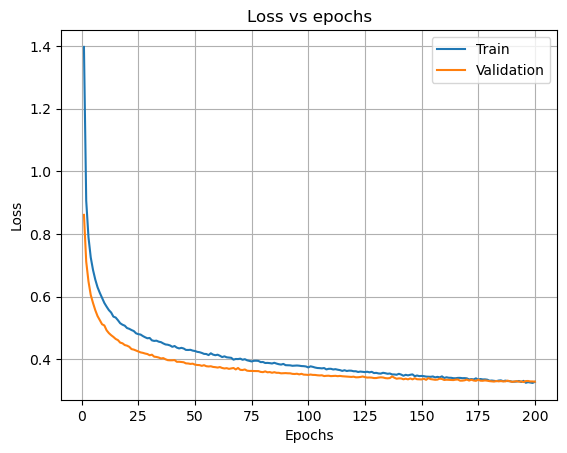

In [35]:
plt.plot(range(1, no_of_epochs + 1), train_loss4, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss4, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

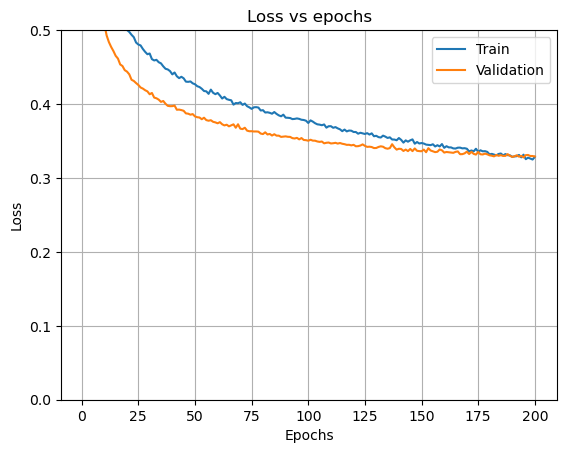

In [36]:
plt.plot(range(1, no_of_epochs + 1), train_loss4, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss4, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.5)
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

In [37]:
train_accuracy4 = model4.history.history['accuracy']
val_accuracy4 = model4.history.history['val_accuracy']

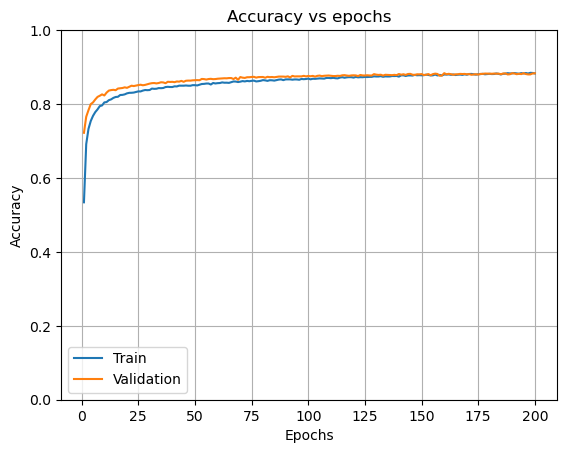

In [38]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy4, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy4, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

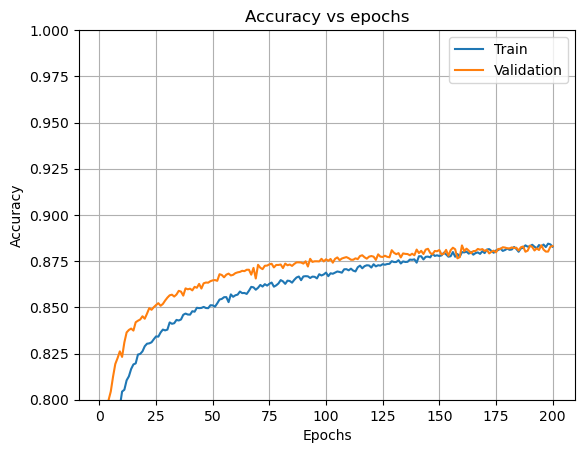

In [39]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy4, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy4, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

#### There is no overfitting and we are able to achieve much better accuracy compared to benchmark model. The model still hasnt converged and we can go further, this we might take up in the final fine tuning.

### Model 5 - One hidden layer with 100 neurons and regularization

In [64]:
np.random.seed(123)
model5 = Sequential()
model5.add(Dense(100, activation = 'relu', kernel_regularizer = L1L2(l1=0, l2=0.007)))
model5.add(Dense(10, activation = 'softmax'))
model5.compile(optimizer = SGD(learning_rate), loss = 'categorical_crossentropy', metrics = 'accuracy')
model5.fit(x_train_partial_norm, y_train_partial, validation_data = (x_val_norm, y_val), epochs = no_of_epochs, batch_size = batch_size, use_multiprocessing = True)

Epoch 1/200
48/48 [==============================] - 2s 24ms/step - loss: 2.3188 - accuracy: 0.6391 - val_loss: 1.9244 - val_accuracy: 0.7219
Epoch 2/200
48/48 [==============================] - 1s 16ms/step - loss: 1.8072 - accuracy: 0.7380 - val_loss: 1.7395 - val_accuracy: 0.7352
Epoch 3/200
48/48 [==============================] - 1s 17ms/step - loss: 1.5995 - accuracy: 0.7697 - val_loss: 1.5220 - val_accuracy: 0.7728
Epoch 4/200
48/48 [==============================] - 1s 16ms/step - loss: 1.4519 - accuracy: 0.7841 - val_loss: 1.3719 - val_accuracy: 0.8012
Epoch 5/200
48/48 [==============================] - 1s 16ms/step - loss: 1.3246 - accuracy: 0.7975 - val_loss: 1.2603 - val_accuracy: 0.8091
Epoch 6/200
48/48 [==============================] - 1s 17ms/step - loss: 1.2194 - accuracy: 0.8056 - val_loss: 1.1925 - val_accuracy: 0.7949
Epoch 7/200
48/48 [==============================] - 1s 17ms/step - loss: 1.1352 - accuracy: 0.8106 - val_loss: 1.0768 - val_accuracy: 0.8261
Epoch 

48/48 [==============================] - 1s 16ms/step - loss: 0.4989 - accuracy: 0.8499 - val_loss: 0.5045 - val_accuracy: 0.8505
Epoch 59/200
48/48 [==============================] - 1s 15ms/step - loss: 0.4945 - accuracy: 0.8528 - val_loss: 0.5087 - val_accuracy: 0.8463
Epoch 60/200
48/48 [==============================] - 1s 15ms/step - loss: 0.4906 - accuracy: 0.8534 - val_loss: 0.5447 - val_accuracy: 0.8353
Epoch 61/200
48/48 [==============================] - 1s 15ms/step - loss: 0.4978 - accuracy: 0.8525 - val_loss: 0.5387 - val_accuracy: 0.8266
Epoch 62/200
48/48 [==============================] - 1s 15ms/step - loss: 0.4941 - accuracy: 0.8515 - val_loss: 0.5132 - val_accuracy: 0.8485
Epoch 63/200
48/48 [==============================] - 1s 20ms/step - loss: 0.5006 - accuracy: 0.8493 - val_loss: 0.5003 - val_accuracy: 0.8532
Epoch 64/200
48/48 [==============================] - 1s 18ms/step - loss: 0.4954 - accuracy: 0.8508 - val_loss: 0.4902 - val_accuracy: 0.8577
Epoch 65/200

48/48 [==============================] - 1s 15ms/step - loss: 0.4780 - accuracy: 0.8553 - val_loss: 0.4772 - val_accuracy: 0.8571
Epoch 116/200
48/48 [==============================] - 1s 15ms/step - loss: 0.4653 - accuracy: 0.8611 - val_loss: 0.5017 - val_accuracy: 0.8489
Epoch 117/200
48/48 [==============================] - 1s 15ms/step - loss: 0.4732 - accuracy: 0.8580 - val_loss: 0.4769 - val_accuracy: 0.8585
Epoch 118/200
48/48 [==============================] - 1s 15ms/step - loss: 0.4673 - accuracy: 0.8596 - val_loss: 0.5891 - val_accuracy: 0.8211
Epoch 119/200
48/48 [==============================] - 1s 15ms/step - loss: 0.4743 - accuracy: 0.8561 - val_loss: 0.5145 - val_accuracy: 0.8451
Epoch 120/200
48/48 [==============================] - 1s 15ms/step - loss: 0.4732 - accuracy: 0.8574 - val_loss: 0.4715 - val_accuracy: 0.8577
Epoch 121/200
48/48 [==============================] - 1s 15ms/step - loss: 0.4710 - accuracy: 0.8564 - val_loss: 0.5110 - val_accuracy: 0.8467
Epoch 

Epoch 172/200
48/48 [==============================] - 1s 15ms/step - loss: 0.4737 - accuracy: 0.8574 - val_loss: 0.5072 - val_accuracy: 0.8403
Epoch 173/200
48/48 [==============================] - 1s 15ms/step - loss: 0.4575 - accuracy: 0.8628 - val_loss: 0.4539 - val_accuracy: 0.8660
Epoch 174/200
48/48 [==============================] - 1s 15ms/step - loss: 0.4573 - accuracy: 0.8631 - val_loss: 0.4854 - val_accuracy: 0.8500
Epoch 175/200
48/48 [==============================] - 1s 15ms/step - loss: 0.4710 - accuracy: 0.8555 - val_loss: 0.5015 - val_accuracy: 0.8391
Epoch 176/200
48/48 [==============================] - 1s 15ms/step - loss: 0.4664 - accuracy: 0.8591 - val_loss: 0.4973 - val_accuracy: 0.8474
Epoch 177/200
48/48 [==============================] - 1s 15ms/step - loss: 0.4506 - accuracy: 0.8637 - val_loss: 0.4982 - val_accuracy: 0.8494
Epoch 178/200
48/48 [==============================] - 1s 16ms/step - loss: 0.4564 - accuracy: 0.8620 - val_loss: 0.4970 - val_accuracy:

In [41]:
train_loss5 = model5.history.history['loss']
val_loss5 = model5.history.history['val_loss']

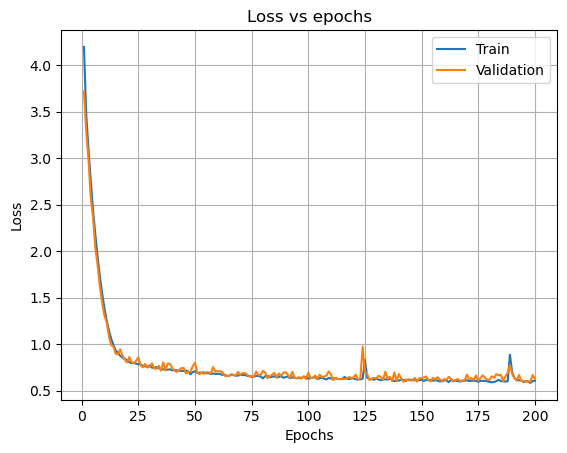

In [42]:
plt.plot(range(1, no_of_epochs + 1), train_loss5, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss5, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

In [43]:
train_accuracy5 = model5.history.history['accuracy']
val_accuracy5 = model5.history.history['val_accuracy']

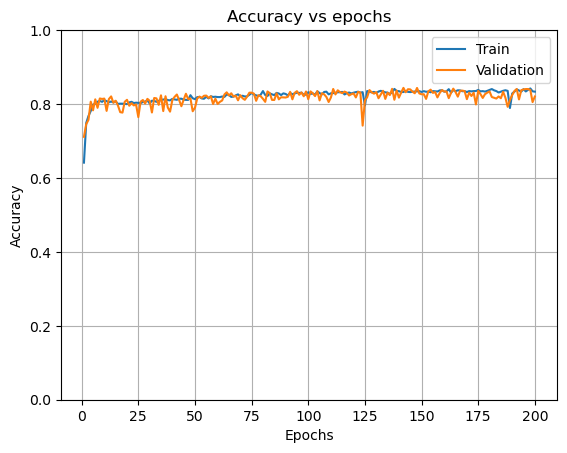

In [44]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy5, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy5, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

#### Looks like the mdoel with dropout is giving us the best results. We will take that model and do further refinement on batch size, learning rate and number of epochs to  find an optimal model

### Model 6 - One hidden layer with 100 neurons, dropout and further fine tuning

In [83]:
no_of_epochs = 250
batch_size = 1000
learning_rate = 0.1

In [84]:
np.random.seed(123)
model6 = Sequential()
model6.add(Dense(100, activation = 'relu'))
model6.add(Dropout(0.5))
model6.add(Dense(10, activation = 'softmax'))
model6.compile(optimizer = SGD(learning_rate), loss = 'categorical_crossentropy', metrics = 'accuracy')
model6.fit(x_train_partial_norm, y_train_partial, validation_data = (x_val_norm, y_val), epochs = no_of_epochs, batch_size = batch_size, use_multiprocessing = True)

Epoch 1/250
48/48 [==============================] - 2s 28ms/step - loss: 1.3805 - accuracy: 0.5305 - val_loss: 0.8796 - val_accuracy: 0.7199
Epoch 2/250
48/48 [==============================] - 1s 23ms/step - loss: 0.9325 - accuracy: 0.6811 - val_loss: 0.7276 - val_accuracy: 0.7637
Epoch 3/250
48/48 [==============================] - 1s 26ms/step - loss: 0.8083 - accuracy: 0.7270 - val_loss: 0.6526 - val_accuracy: 0.7874
Epoch 4/250
48/48 [==============================] - 1s 23ms/step - loss: 0.7376 - accuracy: 0.7516 - val_loss: 0.6115 - val_accuracy: 0.7981
Epoch 5/250
48/48 [==============================] - 1s 21ms/step - loss: 0.6962 - accuracy: 0.7656 - val_loss: 0.5784 - val_accuracy: 0.8090
Epoch 6/250
48/48 [==============================] - 1s 23ms/step - loss: 0.6631 - accuracy: 0.7759 - val_loss: 0.5557 - val_accuracy: 0.8165
Epoch 7/250
48/48 [==============================] - 1s 23ms/step - loss: 0.6344 - accuracy: 0.7874 - val_loss: 0.5371 - val_accuracy: 0.8193
Epoch 

48/48 [==============================] - 1s 18ms/step - loss: 0.4121 - accuracy: 0.8568 - val_loss: 0.3752 - val_accuracy: 0.8663
Epoch 59/250
48/48 [==============================] - 1s 18ms/step - loss: 0.4130 - accuracy: 0.8551 - val_loss: 0.3731 - val_accuracy: 0.8668
Epoch 60/250
48/48 [==============================] - 1s 20ms/step - loss: 0.4103 - accuracy: 0.8558 - val_loss: 0.3716 - val_accuracy: 0.8676
Epoch 61/250
48/48 [==============================] - 1s 19ms/step - loss: 0.4105 - accuracy: 0.8557 - val_loss: 0.3728 - val_accuracy: 0.8683
Epoch 62/250
48/48 [==============================] - 1s 21ms/step - loss: 0.4105 - accuracy: 0.8571 - val_loss: 0.3703 - val_accuracy: 0.8676
Epoch 63/250
48/48 [==============================] - 1s 22ms/step - loss: 0.4103 - accuracy: 0.8568 - val_loss: 0.3699 - val_accuracy: 0.8689
Epoch 64/250
48/48 [==============================] - 1s 18ms/step - loss: 0.4069 - accuracy: 0.8568 - val_loss: 0.3707 - val_accuracy: 0.8684
Epoch 65/250

48/48 [==============================] - 1s 18ms/step - loss: 0.3670 - accuracy: 0.8716 - val_loss: 0.3465 - val_accuracy: 0.8752
Epoch 116/250
48/48 [==============================] - 1s 18ms/step - loss: 0.3694 - accuracy: 0.8711 - val_loss: 0.3483 - val_accuracy: 0.8752
Epoch 117/250
48/48 [==============================] - 1s 18ms/step - loss: 0.3662 - accuracy: 0.8726 - val_loss: 0.3477 - val_accuracy: 0.8744
Epoch 118/250
48/48 [==============================] - 1s 18ms/step - loss: 0.3668 - accuracy: 0.8706 - val_loss: 0.3444 - val_accuracy: 0.8763
Epoch 119/250
48/48 [==============================] - 1s 18ms/step - loss: 0.3653 - accuracy: 0.8713 - val_loss: 0.3460 - val_accuracy: 0.8771
Epoch 120/250
48/48 [==============================] - 1s 18ms/step - loss: 0.3648 - accuracy: 0.8724 - val_loss: 0.3451 - val_accuracy: 0.8756
Epoch 121/250
48/48 [==============================] - 1s 18ms/step - loss: 0.3624 - accuracy: 0.8715 - val_loss: 0.3448 - val_accuracy: 0.8753
Epoch 

Epoch 172/250
48/48 [==============================] - 1s 18ms/step - loss: 0.3417 - accuracy: 0.8799 - val_loss: 0.3336 - val_accuracy: 0.8794
Epoch 173/250
48/48 [==============================] - 1s 18ms/step - loss: 0.3399 - accuracy: 0.8816 - val_loss: 0.3347 - val_accuracy: 0.8802
Epoch 174/250
48/48 [==============================] - 1s 18ms/step - loss: 0.3413 - accuracy: 0.8796 - val_loss: 0.3340 - val_accuracy: 0.8803
Epoch 175/250
48/48 [==============================] - 1s 18ms/step - loss: 0.3421 - accuracy: 0.8790 - val_loss: 0.3332 - val_accuracy: 0.8800
Epoch 176/250
48/48 [==============================] - 1s 18ms/step - loss: 0.3396 - accuracy: 0.8800 - val_loss: 0.3318 - val_accuracy: 0.8814
Epoch 177/250
48/48 [==============================] - 1s 18ms/step - loss: 0.3420 - accuracy: 0.8789 - val_loss: 0.3319 - val_accuracy: 0.8807
Epoch 178/250
48/48 [==============================] - 1s 18ms/step - loss: 0.3374 - accuracy: 0.8813 - val_loss: 0.3332 - val_accuracy:

Epoch 229/250
48/48 [==============================] - 1s 20ms/step - loss: 0.3243 - accuracy: 0.8843 - val_loss: 0.3269 - val_accuracy: 0.8830
Epoch 230/250
48/48 [==============================] - 1s 18ms/step - loss: 0.3222 - accuracy: 0.8873 - val_loss: 0.3272 - val_accuracy: 0.8808
Epoch 231/250
48/48 [==============================] - 1s 18ms/step - loss: 0.3194 - accuracy: 0.8872 - val_loss: 0.3271 - val_accuracy: 0.8811
Epoch 232/250
48/48 [==============================] - 1s 18ms/step - loss: 0.3231 - accuracy: 0.8864 - val_loss: 0.3257 - val_accuracy: 0.8823
Epoch 233/250
48/48 [==============================] - 1s 18ms/step - loss: 0.3212 - accuracy: 0.8847 - val_loss: 0.3274 - val_accuracy: 0.8823
Epoch 234/250
48/48 [==============================] - 1s 18ms/step - loss: 0.3204 - accuracy: 0.8855 - val_loss: 0.3263 - val_accuracy: 0.8825
Epoch 235/250
48/48 [==============================] - 1s 18ms/step - loss: 0.3196 - accuracy: 0.8880 - val_loss: 0.3245 - val_accuracy:

In [85]:
train_loss6= model6.history.history['loss']
val_loss6 = model6.history.history['val_loss']

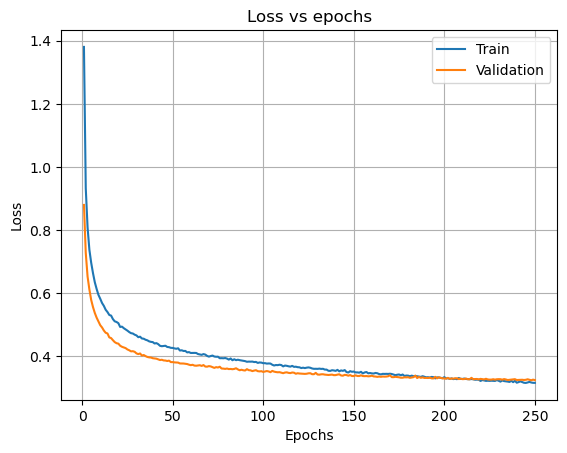

In [86]:
plt.plot(range(1, no_of_epochs + 1), train_loss6, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss6, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

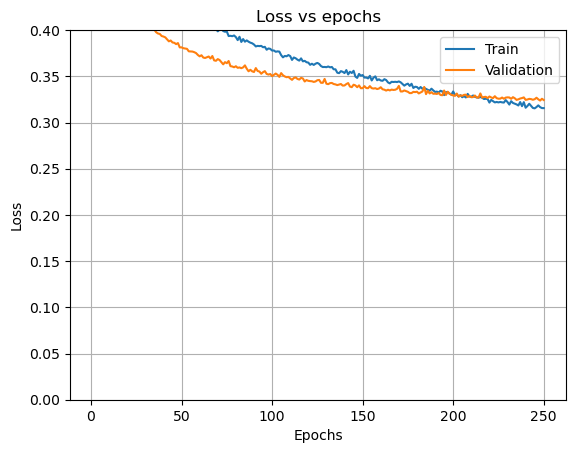

In [87]:
plt.plot(range(1, no_of_epochs + 1), train_loss6, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss6, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.4)
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

In [88]:
train_accuracy6 = model6.history.history['accuracy']
val_accuracy6 = model6.history.history['val_accuracy']

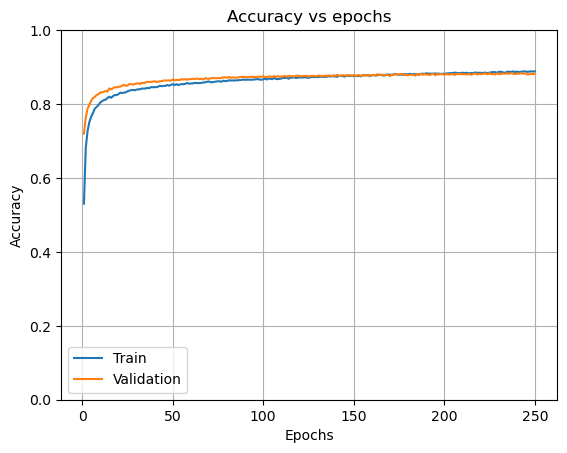

In [89]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy6, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy6, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

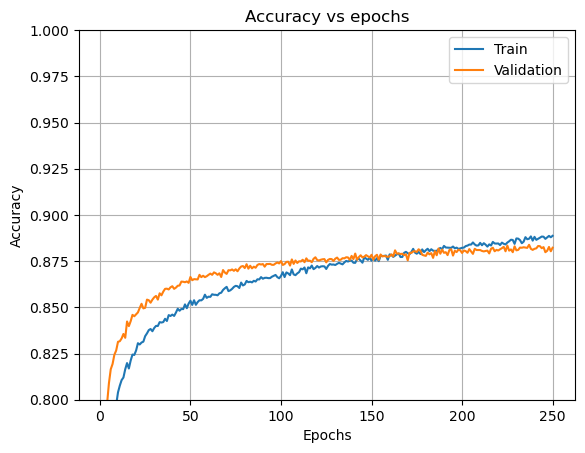

In [90]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy6, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy6, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

#### There is no sign of sever overfitting and the accuracy is very good. We choose this as our final model, train on our train set and evaluate on test set.

# Final Model

In [91]:
no_of_epochs = 250
batch_size = 1000
learning_rate = 0.1

In [92]:
final_scaler = MinMaxScaler()
x_train_norm = final_scaler.fit_transform(x_train_reshape)
x_test_norm = final_scaler.transform(x_test_reshape)

In [93]:
np.random.seed(123)
final_model = Sequential()
final_model.add(Dense(100, activation = 'relu'))
final_model.add(Dropout(0.5))
final_model.add(Dense(10, activation = 'softmax'))
final_model.compile(optimizer = SGD(learning_rate), loss = 'categorical_crossentropy', metrics = 'accuracy')
final_model.fit(x_train_norm, y_train_ohe, validation_data = (x_test_norm, y_test_ohe), epochs = no_of_epochs, batch_size = batch_size, use_multiprocessing = True)

Epoch 1/250
60/60 [==============================] - 2s 23ms/step - loss: 1.2831 - accuracy: 0.5723 - val_loss: 0.8004 - val_accuracy: 0.7345
Epoch 2/250
60/60 [==============================] - 1s 18ms/step - loss: 0.8438 - accuracy: 0.7133 - val_loss: 0.6771 - val_accuracy: 0.7738
Epoch 3/250
60/60 [==============================] - 1s 18ms/step - loss: 0.7429 - accuracy: 0.7495 - val_loss: 0.6186 - val_accuracy: 0.7890
Epoch 4/250
60/60 [==============================] - 1s 18ms/step - loss: 0.6826 - accuracy: 0.7690 - val_loss: 0.5837 - val_accuracy: 0.7981
Epoch 5/250
60/60 [==============================] - 1s 18ms/step - loss: 0.6489 - accuracy: 0.7824 - val_loss: 0.5618 - val_accuracy: 0.8055
Epoch 6/250
60/60 [==============================] - 1s 18ms/step - loss: 0.6182 - accuracy: 0.7893 - val_loss: 0.5411 - val_accuracy: 0.8104
Epoch 7/250
60/60 [==============================] - 1s 18ms/step - loss: 0.5958 - accuracy: 0.7989 - val_loss: 0.5225 - val_accuracy: 0.8173
Epoch 

60/60 [==============================] - 1s 19ms/step - loss: 0.3989 - accuracy: 0.8612 - val_loss: 0.3817 - val_accuracy: 0.8631
Epoch 59/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3988 - accuracy: 0.8607 - val_loss: 0.3815 - val_accuracy: 0.8644
Epoch 60/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3981 - accuracy: 0.8594 - val_loss: 0.3803 - val_accuracy: 0.8643
Epoch 61/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3958 - accuracy: 0.8621 - val_loss: 0.3820 - val_accuracy: 0.8638
Epoch 62/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3943 - accuracy: 0.8627 - val_loss: 0.3797 - val_accuracy: 0.8643
Epoch 63/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3955 - accuracy: 0.8613 - val_loss: 0.3788 - val_accuracy: 0.8657
Epoch 64/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3942 - accuracy: 0.8625 - val_loss: 0.3784 - val_accuracy: 0.8649
Epoch 65/250

60/60 [==============================] - 1s 17ms/step - loss: 0.3554 - accuracy: 0.8745 - val_loss: 0.3529 - val_accuracy: 0.8758
Epoch 116/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3548 - accuracy: 0.8755 - val_loss: 0.3528 - val_accuracy: 0.8760
Epoch 117/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3565 - accuracy: 0.8752 - val_loss: 0.3527 - val_accuracy: 0.8743
Epoch 118/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3551 - accuracy: 0.8755 - val_loss: 0.3546 - val_accuracy: 0.8756
Epoch 119/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3543 - accuracy: 0.8758 - val_loss: 0.3522 - val_accuracy: 0.8740
Epoch 120/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3541 - accuracy: 0.8756 - val_loss: 0.3527 - val_accuracy: 0.8766
Epoch 121/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3545 - accuracy: 0.8747 - val_loss: 0.3520 - val_accuracy: 0.8758
Epoch 

Epoch 172/250
60/60 [==============================] - 1s 18ms/step - loss: 0.3323 - accuracy: 0.8826 - val_loss: 0.3421 - val_accuracy: 0.8804
Epoch 173/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3322 - accuracy: 0.8812 - val_loss: 0.3394 - val_accuracy: 0.8810
Epoch 174/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3313 - accuracy: 0.8820 - val_loss: 0.3409 - val_accuracy: 0.8797
Epoch 175/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3318 - accuracy: 0.8817 - val_loss: 0.3400 - val_accuracy: 0.8808
Epoch 176/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3316 - accuracy: 0.8814 - val_loss: 0.3397 - val_accuracy: 0.8786
Epoch 177/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3301 - accuracy: 0.8834 - val_loss: 0.3399 - val_accuracy: 0.8810
Epoch 178/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3299 - accuracy: 0.8835 - val_loss: 0.3446 - val_accuracy:

Epoch 229/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3145 - accuracy: 0.8884 - val_loss: 0.3348 - val_accuracy: 0.8817
Epoch 230/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3110 - accuracy: 0.8893 - val_loss: 0.3326 - val_accuracy: 0.8833
Epoch 231/250
60/60 [==============================] - 1s 19ms/step - loss: 0.3152 - accuracy: 0.8870 - val_loss: 0.3367 - val_accuracy: 0.8817
Epoch 232/250
60/60 [==============================] - 1s 18ms/step - loss: 0.3146 - accuracy: 0.8876 - val_loss: 0.3337 - val_accuracy: 0.8813
Epoch 233/250
60/60 [==============================] - 1s 17ms/step - loss: 0.3139 - accuracy: 0.8879 - val_loss: 0.3328 - val_accuracy: 0.8833
Epoch 234/250
60/60 [==============================] - 1s 18ms/step - loss: 0.3107 - accuracy: 0.8890 - val_loss: 0.3342 - val_accuracy: 0.8809
Epoch 235/250
60/60 [==============================] - 1s 18ms/step - loss: 0.3118 - accuracy: 0.8898 - val_loss: 0.3359 - val_accuracy:

In [94]:
final_train_loss= final_model.history.history['loss']
final_test_loss = final_model.history.history['val_loss']

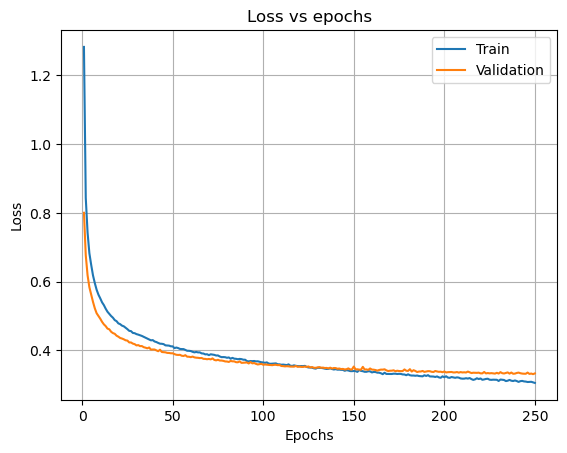

In [95]:
plt.plot(range(1, no_of_epochs + 1), final_train_loss, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), final_test_loss, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

In [96]:
final_train_accuracy = final_model.history.history['accuracy']
final_test_accuracy = final_model.history.history['val_accuracy']

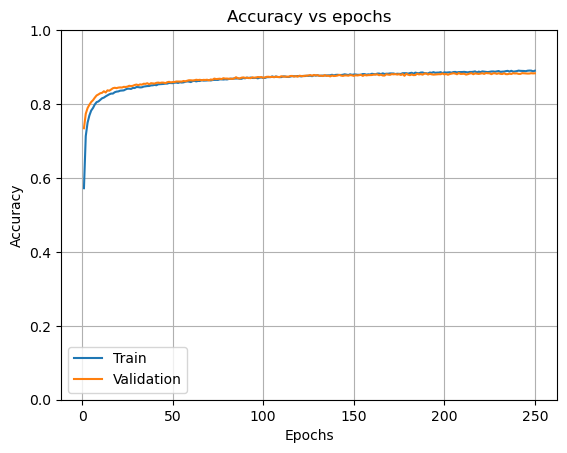

In [97]:
plt.plot(range(1, no_of_epochs + 1), final_train_accuracy, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), final_test_accuracy, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

In [98]:
def make_predictions(model, input_data, scaler):
    '''
    Description:
    Using a neural network the model makes predictions on the same
    Inputs:
    model: Neural network model
    input_data: 2D array of one or more records arranged along rows non-normalized
    Output:
    A 2d array with predictions of class for each record
    '''
    input_data_norm = scaler.transform(input_data)
    return np.argmax(model.predict(input_data_norm), axis = 1)

In [99]:
make_predictions(final_model, x_test_reshape, final_scaler)

313/313 [==============================] - 2s 3ms/step


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [100]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)